**LIBRARY IMPORTS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**FUNCTION DEFINITIONS**


In [ ]:
def mul(q1, q2):
  q1 = norm_4(q1)
  q2 = norm_4(q2)
  r1 = q1[0]
  r2 = q2[0]
  w1 = q1[1:]
  w2 = q2[1:]

  r_prod = r1*r2 - np.dot(w1, w2)
  w_prod = np.sum([[r1*w for w in w2], [r2*w for w in w1]], axis=0) + np.cross(w1, w2)
  prod = [0, 0, 0, 0]
  prod[0] = r_prod
  prod[1:] = w_prod

  return prod

In [ ]:
def get_norm(vec):
   norm = (vec[0]**2 + vec[1]**2 + vec[2]**2)**0.5
   return norm

In [ ]:
def norm_4(quat):
  norm_q = (quat[0]**2 + quat[1]**2 + quat[2]**2 + quat[3]**2)**0.5
  quat = [q/norm_q for q in quat]
  return quat

In [ ]:
def norm_3(vec):
  norm = (vec[0]**2 + vec[1]**2 + vec[2]**2)**0.5
  vec = [v/norm for v in vec]
  return vec

In [ ]:
def calc_euler_angles(acc_g, mag_b):
    acc_g = [a/9.81 for a in acc_g]

    #Detect quadrant and adjust the outputs of arctan2 accordingly

    #Roll
    if(acc_g[1]>0 and acc_g[2]<0):
        acc_roll = (np.arctan2(acc_g[1], acc_g[2])-np.pi)
    elif(acc_g[1]<0 and acc_g[2]<0):
        acc_roll = (np.arctan2(acc_g[1], acc_g[2])+np.pi)
    else:
        acc_roll = (np.arctan2(acc_g[1], acc_g[2]))

    #Pitch
    if(-acc_g[0]>0 and ((acc_g[1]**2 + acc_g[2]**2)**0.5)<0):
        acc_pitch = (np.arctan2(-acc_g[0], ((acc_g[1]**2 + acc_g[2]**2)**0.5))-np.pi)
    elif(-acc_g[0]<0 and ((acc_g[1]**2 + acc_g[2]**2)**0.5)<0):
        acc_pitch = (np.arctan2(-acc_g[0], ((acc_g[1]**2 + acc_g[2]**2)**0.5))+np.pi)
    else:
        acc_pitch = (np.arctan2(-acc_g[0], ((acc_g[1]**2 + acc_g[2]**2)**0.5)))

    mag_x = mag_b[0] * np.cos(acc_pitch) - mag_b[2] * np.sin(acc_pitch)
    mag_y = mag_b[0] * np.sin(acc_roll) * np.sin(acc_pitch) + mag_b[1] * np.cos(acc_roll) - mag_b[2] * np.sin(acc_roll) * np.cos(acc_pitch)

    if(-mag_y>0 and mag_x<0):
        mag_yaw = (np.arctan2(-mag_y, mag_x)-np.pi)
    elif(-mag_y<0 and mag_x<0):
        mag_yaw = (np.arctan2(-mag_y, mag_x)+np.pi)
    else:
        mag_yaw = (np.arctan2(-mag_y, mag_x))

    pitch, roll, yaw = acc_pitch, acc_roll, mag_yaw #Angles are in radians by default
    euler_angles = [roll, pitch, yaw]

    return euler_angles

In [ ]:
def calc_init(acc_g, mag_b):
    acc_g = [a/9.81 for a in acc_g]

    #Detect quadrant and adjust the outputs of arctan2 accordingly

    #Roll
    if(acc_g[1]>0 and acc_g[2]<0):
        acc_roll = (np.arctan2(acc_g[1], acc_g[2])-np.pi)
    elif(acc_g[1]<0 and acc_g[2]<0):
        acc_roll = (np.arctan2(acc_g[1], acc_g[2])+np.pi)
    else:
        acc_roll = (np.arctan2(acc_g[1], acc_g[2]))

    #Pitch
    if(-acc_g[0]>0 and ((acc_g[1]**2 + acc_g[2]**2)**0.5)<0):
        acc_pitch = (np.arctan2(-acc_g[0], ((acc_g[1]**2 + acc_g[2]**2)**0.5))-np.pi)
    elif(-acc_g[0]<0 and ((acc_g[1]**2 + acc_g[2]**2)**0.5)<0):
        acc_pitch = (np.arctan2(-acc_g[0], ((acc_g[1]**2 + acc_g[2]**2)**0.5))+np.pi)
    else:
        acc_pitch = (np.arctan2(-acc_g[0], ((acc_g[1]**2 + acc_g[2]**2)**0.5)))

    mag_x = mag_b[0] * np.cos(acc_pitch) - mag_b[2] * np.sin(acc_pitch)
    mag_y = mag_b[0] * np.sin(acc_roll) * np.sin(acc_pitch) + mag_b[1] * np.cos(acc_roll) - mag_b[2] * np.sin(acc_roll) * np.cos(acc_pitch)

    if(-mag_y>0 and mag_x<0):
        mag_yaw = (np.arctan2(-mag_y, mag_x)-np.pi)
    elif(-mag_y<0 and mag_x<0):
        mag_yaw = (np.arctan2(-mag_y, mag_x)+np.pi)
    else:
        mag_yaw = (np.arctan2(-mag_y, mag_x))

    pitch, roll, yaw = acc_pitch, acc_roll, mag_yaw #Angles are in rad by default
    print("Inside calc_init: p, r, y: ", pitch, roll, yaw)
    quat = calc_quat(roll, pitch, yaw)
    print("Inside calc_init: ", quat)
    return quat

In [ ]:
def calc_quat(yaw, pitch, roll):

        qx = np.sin(roll/2) * np.cos(pitch/2) * np.cos(yaw/2) - np.cos(roll/2) * np.sin(pitch/2) * np.sin(yaw/2)
        qy = np.cos(roll/2) * np.sin(pitch/2) * np.cos(yaw/2) + np.sin(roll/2) * np.cos(pitch/2) * np.sin(yaw/2)
        qz = np.cos(roll/2) * np.cos(pitch/2) * np.sin(yaw/2) - np.sin(roll/2) * np.sin(pitch/2) * np.cos(yaw/2)
        qw = np.cos(roll/2) * np.cos(pitch/2) * np.cos(yaw/2) + np.sin(roll/2) * np.sin(pitch/2) * np.sin(yaw/2)

        return [qw, qx, qy, qz]

In [ ]:
def calc_euler_dot(euler_angles, gyro_w):
  W = gyro_w
  roll, pitch, yaw = euler_angles[0], euler_angles[1], euler_angles[2]
  P = [[1, np.tan(pitch)*np.sin(roll), np.tan(pitch)*np.cos(roll)], [0, np.cos(roll), -np.sin(roll)], [0, (1/np.cos(pitch))*np.sin(roll), (1/np.cos(pitch))*np.cos(roll)]]
  euler_dot = np.matmul(P, W)
  return euler_dot

In [ ]:
def calc_quat_dot(quat, gyro_w):
    W = [[gyro_w[0], -gyro_w[1], -gyro_w[2], -gyro_w[3]], [gyro_w[1], gyro_w[0], gyro_w[3], -gyro_w[2]], [gyro_w[2], -gyro_w[3], gyro_w[0], gyro_w[1]], [gyro_w[3], gyro_w[2], -gyro_w[1], gyro_w[0]]]
    quat_dot = np.dot(W, quat)
    quat_dot = [0.5*q for q in quat_dot]
    return quat_dot

In [ ]:
def calc_acc_roll(acc_g, error_df, lim):

    #Calculate tan inverse
    if(round(acc_g[1], 3)==0):
        acc_roll = 0
    elif(acc_g[1]>0 and acc_g[2]<0):
        acc_roll = (np.arctan2(acc_g[1], acc_g[2])-np.pi)
    elif(acc_g[1]<0 and acc_g[2]<0):
        acc_roll = (np.arctan2(acc_g[1], acc_g[2])+np.pi)
    else:
        acc_roll = (np.arctan2(acc_g[1], acc_g[2]))

    acc_roll = acc_roll*(180/np.pi)

    prev_roll = error_df.iloc[i-1, 0]
    norm = get_norm(acc_g)

    #Detect norm exceeding 10
    if(norm>10):
        acc_roll = prev_roll
    else:
        #Detect angle changing by more than the limit (LIM)
        if(abs(acc_roll-prev_roll)>LIM):
            if(data_in.iloc[i-1, 1]*data_in.iloc[i, 1]<0):
                #Detect change in sign of Y
                if(data_in.iloc[i-1, 1]>0 and data_in.iloc[i, 1]<0):
                    acc_roll = acc_roll - 180
                elif(data_in.iloc[i, 1]>0 and data_in.iloc[i-1, 1]<0):
                    acc_roll = acc_roll + 180
            elif(data_in.iloc[i-1, 2]*data_in.iloc[i, 2]<0):
                #Detect change in sign of Z
                if(data_in.iloc[i-1, 2]>0 and data_in.iloc[i, 2]<0):
                    if(data_in.iloc[i, 1]<0):
                        acc_roll = acc_roll - 180
                    elif(data_in.iloc[i, 1]>0):
                        acc_roll = acc_roll + 180
                elif(data_in.iloc[i, 2]>0 and data_in.iloc[i-1, 2]<0):
                    if(data_in.iloc[i, 1]<0):
                        acc_roll = acc_roll + 180
                    elif(data_in.iloc[i, 1]>0):
                        acc_roll = acc_roll - 180

    #Fix range of acc_roll
    while(acc_roll>180 or acc_roll<-180):
        if(acc_roll>180):
          acc_roll = acc_roll - 360
        elif(acc_roll<-180):
          acc_roll = 360 - acc_roll

    acc_roll = acc_roll*(np.pi/180)

    return acc_roll

In [ ]:
def calc_acc_pitch(acc_g, error_df, lim):

    if(round(acc_g[0], 3)==0):
        acc_pitch = 0
    if(-acc_g[0]>0 and ((acc_g[1]**2 + acc_g[2]**2)**0.5)<0):
        acc_pitch = (np.arctan2(-acc_g[0], ((acc_g[1]**2 + acc_g[2]**2)**0.5))-np.pi)
    elif(-acc_g[0]<0 and ((acc_g[1]**2 + acc_g[2]**2)**0.5)<0):
        acc_pitch = (np.arctan2(-acc_g[0], ((acc_g[1]**2 + acc_g[2]**2)**0.5))+np.pi)
    else:
        acc_pitch = (np.arctan2(-acc_g[0], ((acc_g[1]**2 + acc_g[2]**2)**0.5)))

    acc_pitch = acc_pitch*(180/np.pi)

    prev_pitch = error_df.iloc[i-1, 1]
    norm = get_norm(acc_g)

    #Detect norm exceeding 10
    if(norm>10):
        acc_roll = prev_pitch
    else:
        #Detect angle changing by more than the limit (LIM)
        if(abs(acc_pitch-prev_pitch)>LIM):
            #Detect change in sign of Y
            if(data_in.iloc[i-1, 0]*data_in.iloc[i, 1]<0):
                if(data_in.iloc[i-1, 0]>0 and data_in.iloc[i, 0]<0):
                    acc_pitch = acc_pitch - 90
                elif(data_in.iloc[i, 0]>0 and data_in.iloc[i-1, 0]<0):
                    acc_pitch = acc_pitch + 90

    #Fix range of acc_pitch
    while(acc_pitch>90 or acc_pitch<-90):
        if(acc_pitch>90):
          acc_pitch = acc_pitch - 180
        elif(acc_pitch<-90):
          acc_pitch = 180 - acc_pitch

    acc_pitch = acc_pitch*(np.pi/180)

    return acc_pitch

In [ ]:
def calc_mag_yaw(mag_x, mag_y, error_df, lim):

    if(round(mag_y, 3)==0):
        mag_yaw = 0
    elif(-mag_y>0 and mag_x<0):
        mag_yaw = (np.arctan2(-mag_y, mag_x)-np.pi)
    elif(-mag_y<0 and mag_x<0):
        mag_yaw = (np.arctan2(-mag_y, mag_x)+np.pi)
    else:
        mag_yaw = (np.arctan2(-mag_y, mag_x))

    mag_yaw = mag_yaw*(180/np.pi)

    prev_yaw = error_df.iloc[i-1, 2]

    if(abs(mag_yaw-prev_yaw)>LIM):
        #Detect angle changing by more than the limit (LIM)
        if(-data_in.iloc[i-1, 7] * -data_in.iloc[i, 7]<0):
            #Detect change in sign of Y
            if(-data_in.iloc[i-1, 7]>0 and -data_in.iloc[i, 7]<0):
                mag_yaw = mag_yaw - 180
            elif(-data_in.iloc[i, 7]>0 and -data_in.iloc[i-1, 7]<0):
                mag_yaw = mag_yaw + 180
        elif(data_in.iloc[i-1, 6]*data_in.iloc[i, 6]<0):
            #Detect change in sign of X
            if(data_in.iloc[i-1, 6]>0 and data_in.iloc[i, 6]<0):
                if(-data_in.iloc[i, 7]<0):
                    mag_yaw = mag_yaw - 180
                elif(-data_in.iloc[i, 7]>0):
                    mag_yaw = mag_yaw + 180
            elif(data_in.iloc[i, 6]>0 and data_in.iloc[i-1, 6]<0):
                if(-data_in.iloc[i, 7]<0):
                    mag_yaw = mag_yaw + 180
                elif(-data_in.iloc[i, 7]>0):
                    mag_yaw = mag_yaw - 180

    #Fix range of mag_yaw
    while(mag_yaw>180 or mag_yaw<-180):
        if(mag_yaw>180):
          mag_yaw = mag_yaw - 360
        elif(mag_yaw<-180):
          mag_yaw = 360 - mag_yaw

    mag_yaw = mag_yaw*(np.pi/180)

    return mag_yaw

In [ ]:
def calc_bias(data_in):
    tot_acc = []
    trkx, trky, trkz = [], [], []
    err_gx, err_gy, err_gz = 0, 0, 0
    delx, dely, delz = 0.80, 0.70, 0.90

    for i in range(data_in.shape[0]):
        ax, ay, az = data_in.iloc[i, 0:3]
        acc_norm = (ax**2 + ay**2 + az**2)**0.5
        tot_acc.append(acc_norm)

        if(acc_norm>9.60 and acc_norm<10.0):
            gx, gy, gz = data_in.iloc[i, 3], data_in.iloc[i, 4], data_in.iloc[i, 5]
            err_gx = err_gx*delx + gx*(1-delx) + 0.01
            err_gy = err_gy*dely + gy*(1-dely)
            err_gz = err_gz*delz + gz*(1-delz) - 0.03
        trkx.append(err_gx)
        trky.append(err_gy)
        trkz.append(err_gz)

    return tot_acc, trkx, trky, trkz

**INITIAL DATA PROCESSING**

In [ ]:
csv_full = "/content/AHRS_Data_Complex.csv"
csv_in = '/content/Input_Data.csv'
csv_out = '/content/Output_Data.csv'
corr_csv_out = '/content/Actual_Output_Data.csv'

In [ ]:
data = pd.read_csv(csv_full)
cols = data.columns
data.rename(mapper = {cols[4]:'Roll', cols[5]:'Pitch', cols[6]:'Yaw', cols[13]:'Magnetometer X'}, inplace =True, axis=1)

In [ ]:
input_data = data[cols[7:]]
input_data.head()
input_data.drop(index = [0], axis = 0, inplace = True)
data_in = input_data
data_in.to_csv(csv_in)

In [ ]:
output_data = data[cols[0:7]]
output_data.rename(mapper = {cols[4]:'Roll', cols[5]:'Pitch', cols[6]:'Yaw'}, axis = 1, inplace=True)
output_data.drop(index = 0, axis = 0, inplace = True)
data_out = output_data
data_out.to_csv(corr_csv_out)

In [ ]:
data_in = pd.read_csv(csv_in)
data_in = data_in[0:2367]
data_in.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
data_in.head()

,Accelerometer X,Accelerometer Y,Accelerometer Z,Gyroscope X,Gyroscope Y,Gryroscope Z,Magnetometer X,Magnetometer Y,Magnetometer Z
0,-0.653,8.165,-4.519,-90.130712,-7.449930,21.439334,0.653197,-0.359562,0.235524
1,-0.972,7.931,-4.195,-89.620879,-5.750629,21.793361,0.654433,-0.379475,0.216567
2,-1.396,7.674,-3.854,-91.529876,-7.441048,18.271851,0.655496,-0.391348,0.206009
3,-1.877,7.418,-3.341,-91.774998,-13.924692,12.861258,0.656559,-0.403220,0.195452
4,-1.981,7.383,-2.794,-85.510089,-20.463131,5.928724,0.657622,-0.415092,0.184895


In [ ]:
corr_outputs = pd.read_csv(corr_csv_out)
corr_outputs = corr_outputs[0:2367]
corr_outputs.drop(labels = ['Unnamed: 0'], inplace = True, axis = 1)
corr_outputs.drop(index = 0, inplace = True, axis = 0)

**DATAFRAME INITIALISATIONS**

In [ ]:
data_out_nf = pd.DataFrame(columns = ['q0','q1','q2','q3','Roll', 'Pitch', 'Yaw'], index = range(0,data_in.shape[0]))
data_out_nf_2 = pd.DataFrame(columns = ['q0','q1','q2','q3','Roll', 'Pitch', 'Yaw'], index = range(0,data_in.shape[0]))
data_out_nf_bc = pd.DataFrame(columns = ['q0','q1','q2','q3','Roll', 'Pitch', 'Yaw'], index = range(0,data_in.shape[0]))
data_out_cf = pd.DataFrame(columns = ['q0','q1','q2','q3','Roll', 'Pitch', 'Yaw'], index = range(0,data_in.shape[0]))
data_out_eu = pd.DataFrame(columns = ['Roll', 'Pitch', 'Yaw'], index = range(0,data_in.shape[0]))

In [ ]:
#To store the errors with and without filteration
error_df = pd.DataFrame(columns=['Roll', 'Pitch', 'Yaw'], index = range(0, data_in.shape[0]))
error_df1 = pd.DataFrame(columns=['Roll Error', 'Pitch Error', 'Yaw Error'], index = range(0, data_in.shape[0]))
error_df2 = pd.DataFrame(columns=['Roll Error', 'Pitch Error', 'Yaw Error'], index = range(0, data_in.shape[0]))
error_df3 = pd.DataFrame(columns=['Roll Error', 'Pitch Error', 'Yaw Error'], index = range(0, data_in.shape[0]))


**INPUT DATA**

In [ ]:
data_in.head()

,Accelerometer X,Accelerometer Y,Accelerometer Z,Gyroscope X,Gyroscope Y,Gryroscope Z,Magnetometer X,Magnetometer Y,Magnetometer Z
0,-0.653,8.165,-4.519,-90.130712,-7.449930,21.439334,0.653197,-0.359562,0.235524
1,-0.972,7.931,-4.195,-89.620879,-5.750629,21.793361,0.654433,-0.379475,0.216567
2,-1.396,7.674,-3.854,-91.529876,-7.441048,18.271851,0.655496,-0.391348,0.206009
3,-1.877,7.418,-3.341,-91.774998,-13.924692,12.861258,0.656559,-0.403220,0.195452
4,-1.981,7.383,-2.794,-85.510089,-20.463131,5.928724,0.657622,-0.415092,0.184895


**VARIABLE INITIALISATION**

In [ ]:
acc_g = [a/9.81 for a in np.array(data_in.iloc[0, 0:3])]
gyro_w = np.array(data_in.iloc[0, 3:6])
mag_b = norm_3(np.array(data_in.iloc[0, 6:9]))

DT = 0.005
LIM = np.max(np.array(data_in.iloc[:, 3:6]))/DT

**EULER INTEGRATION**

In [ ]:
for i in range(data_in.shape[0]):
    acc_g = norm_3(np.array(data_in.iloc[i, 0:3]))
    mag_b = np.array(data_in.iloc[i, 6:9])

    if i==0:
       e_i =  calc_euler_angles(acc_g, mag_b)#corr_outputs.iloc[0, 4:]

    w_i = data_in.iloc[i, 3:6] #Data in CSV has the format col1-3:acc, col4-6:gyro, col7-9:mag
    w_i = [w*(np.pi/180) for w in w_i] #Convert to radians per second

    e_dot = calc_euler_dot(e_i, w_i)

    for j in range(len(e_i)):
      e_i[j] = e_i[j] + DT*e_dot[j] #Integrate

    #Convert to degrees
    output = [e*(180/np.pi) for e in e_i]

    #Append results to Output Dataframe
    data_out_eu.iloc[i, 0] = output[0]
    data_out_eu.iloc[i, 1] = output[1]
    data_out_eu.iloc[i, 2] = output[2]


**HEADING CALCULATION - WITHOUT ANY FILTERS**

In [ ]:
acc_g = norm_3(np.array(data_in.iloc[0, 0:3]))
gyro_w = np.array(data_in.iloc[0, 3:6])
mag_b = norm_3(np.array(data_in.iloc[0, 6:9]))

ALPHA = 0.9995
DT = 0.005
LIM = np.max(np.array(data_in.iloc[:, 3:6]))/DT

In [ ]:
for i in range(data_in.shape[0]):
    output = []
    acc_g = norm_3(np.array(data_in.iloc[i, 0:3].astype(np.float64)))
    mag_b = np.array(data_in.iloc[i, 6:9].astype(np.float64))

    if i==0:
      q_i = corr_outputs.iloc[0, 0:4].astype(np.float64)

    w_i = data_in.iloc[i, 3:6].astype(np.float64)#data in csv has the format col1-3:acc, col4-6:gyro, col7-9:mag
    w_i = [w*(np.pi/180) for w in w_i]#Convert to radians per second

    q_w = [0, w_i[0], w_i[1], w_i[2]]
    q_dot = calc_quat_dot(q_i, q_w)

    q_i = np.sum([q_i , [DT*q for q in q_dot]], axis = 0) #Integrate
    q_i = norm_4(q_i) #Normalise

    #Get Euler Angles and convert them into degrees
    output.append((np.arctan2((2*q_i[2]*q_i[3]+ 2*q_i[0]*q_i[1]),(1 -2*(q_i[1]**2 + q_i[2]**2))))*(180/np.pi))#Roll
    output.append((np.arcsin(2*q_i[0]*q_i[2]- 2*q_i[1]*q_i[3]))*(180/np.pi)) #Pitch
    output.append((np.arctan2((2*q_i[1]*q_i[2]+ 2*q_i[0]*q_i[3]),(1- 2*(q_i[2]**2 + q_i[3]**2))))*(180/np.pi))#Yaw

    #Kalman Filter matrix calculations

    #Capture roll, pitch and yaw for error calculation
    prev_roll = data_out_nf.iloc[i-1, 4]
    prev_pitch = data_out_nf.iloc[i-1, 5]
    prev_yaw = data_out_nf.iloc[i-1, 6]

    #Error calculation
    roll_err = abs(prev_roll - output[0])
    pitch_err = abs(prev_pitch - output[1])
    yaw_err = abs(prev_yaw - output[2])

    #Detect discontinuity and reset
    if(roll_err>352):
      roll = 180
    if(pitch_err>172):
      pitch = 90
    if(yaw_err>352):
      yaw = 180

    data_out_nf.iloc[i, 0] = q_i[0]
    data_out_nf.iloc[i, 1] = q_i[1]
    data_out_nf.iloc[i, 2] = q_i[2]
    data_out_nf.iloc[i, 3] = q_i[3]

    data_out_nf.iloc[i, 4] = output[0]
    data_out_nf.iloc[i, 5] = output[1]
    data_out_nf.iloc[i, 6] = output[2]

**HEADING CALCULATION - WITH COMPLEMENTARY FILTER**

In [ ]:
acc_g = norm_3(np.array(data_in.iloc[0, 0:3]))
gyro_w = np.array(data_in.iloc[0, 3:6])
mag_b = norm_3(np.array(data_in.iloc[0, 6:9]))

ALPHA = 0.9995
DT = 0.005
LIM = np.max(np.array(data_in.iloc[:, 3:6]))/DT

In [ ]:
for i in range(data_in.shape[0]):

    if i==0:
      q_i = corr_outputs.iloc[0, 0:4].astype(np.float64)

    w_i = data_in.iloc[i, 3:6].astype(np.float64)#data in csv has the format col1-3:acc, col4-6:gyro, col7-9:mag
    w_i = [w*(np.pi/180) for w in w_i]#Convert to radians per second

    q_w = [0, w_i[0], w_i[1], w_i[2]]
    q_dot = calc_quat_dot(q_i, q_w)

    q_i = np.sum([q_i , [DT*q for q in q_dot]], axis = 0) #Integrate
    q_i = norm_4(q_i) #Normalise

    #Get Euler Angles from Quaternion
    gyro_roll = np.arctan2((2*q_i[2]*q_i[3]+ 2*q_i[0]*q_i[1]),(1 -2*(q_i[1]**2 + q_i[2]**2)))#Roll
    gyro_pitch = np.arcsin(2*q_i[0]*q_i[2]- 2*q_i[1]*q_i[3]) #Pitch
    gyro_yaw = np.arctan2((2*q_i[1]*q_i[2]+ 2*q_i[0]*q_i[3]),(1- 2*(q_i[2]**2 + q_i[3]**2)))#Yaw

    #Get Euler Angles from Accelerometer and Magnetometer
    acc_g = np.array(data_in.iloc[i, 0:3])
    acc_g = [a/9.81 for a in acc_g]
    mag_b = np.array(data_in.iloc[i, 6:9])

    acc_roll = calc_acc_roll(acc_g, error_df, LIM)
    acc_pitch = calc_acc_pitch(acc_g, error_df, LIM)

    mag_x = mag_b[0] * np.cos(acc_pitch) - mag_b[2] * np.sin(acc_pitch)
    mag_y = mag_b[0] * np.sin(acc_roll) * np.sin(acc_pitch) + mag_b[1] * np.cos(acc_roll) - mag_b[2] * np.sin(acc_roll) * np.cos(acc_pitch)

    mag_yaw = calc_mag_yaw(mag_x, mag_y, error_df, LIM)

    q_err = calc_quat(acc_roll, acc_pitch, mag_yaw)
    q_i = np.sum([[ALPHA*q  for q in q_i] , [(1-ALPHA)*q for q in q_err]], axis = 0)

    #Complimentary Filtering
    roll = ((gyro_roll)*(ALPHA) + acc_roll*(1-ALPHA))*(180/np.pi)
    pitch = ((gyro_pitch)*(ALPHA) + acc_pitch*(1-ALPHA))*(180/np.pi)
    yaw = ((gyro_yaw)*(ALPHA) + mag_yaw*(1-ALPHA))*(180/np.pi)

    #Capture roll, pitch and yaw for error calculation
    prev_roll = data_out_cf.iloc[i-1, 4]
    prev_pitch = data_out_cf.iloc[i-1, 5]
    prev_yaw = data_out_cf.iloc[i-1, 6]

    #Error calculation
    roll_err = abs(prev_roll - np.rad2deg(gyro_roll))
    pitch_err = abs(prev_pitch - np.rad2deg(gyro_pitch))
    yaw_err = abs(prev_yaw - np.rad2deg(gyro_yaw))

    #Detect discontinuity and reset
    if(roll_err>352):
      roll = 360 - roll_err
    if(pitch_err>172):
      pitch = 180 - pitch_err
    if(yaw_err>352):
      yaw = 360 - yaw_err

    #Append results to Output Dataframe
    error_df.iloc[i, 0:3] = [acc_roll*(180/np.pi), acc_pitch*(180/np.pi), mag_yaw*(180/np.pi)]

    data_out_cf.iloc[i, 0] = q_i[0]
    data_out_cf.iloc[i, 1] = q_i[1]
    data_out_cf.iloc[i, 2] = q_i[2]
    data_out_cf.iloc[i, 3] = q_i[3]

    data_out_cf.iloc[i, 4] = roll
    data_out_cf.iloc[i, 5] = pitch
    data_out_cf.iloc[i, 6] = yaw

**BIAS COMPENSATION STUDY**

In [ ]:
data_in = pd.read_csv('/content/Input_Data.csv')
data_in = data_in[0:2367]
data_in.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
data_in.head()

,Accelerometer X,Accelerometer Y,Accelerometer Z,Gyroscope X,Gyroscope Y,Gryroscope Z,Magnetometer X,Magnetometer Y,Magnetometer Z
0,-0.653,8.165,-4.519,-90.130712,-7.449930,21.439334,0.653197,-0.359562,0.235524
1,-0.972,7.931,-4.195,-89.620879,-5.750629,21.793361,0.654433,-0.379475,0.216567
2,-1.396,7.674,-3.854,-91.529876,-7.441048,18.271851,0.655496,-0.391348,0.206009
3,-1.877,7.418,-3.341,-91.774998,-13.924692,12.861258,0.656559,-0.403220,0.195452
4,-1.981,7.383,-2.794,-85.510089,-20.463131,5.928724,0.657622,-0.415092,0.184895


**ARTIFICIAL ERROR INJECTION**

In [ ]:
for i in range(data_in.shape[0]):
    data_in.iloc[i, 3] = data_in.iloc[i, 3] + 1.2
    data_in.iloc[i, 4] = data_in.iloc[i, 4] + 1.3
    data_in.iloc[i, 5] = data_in.iloc[i, 5] + 1.5

data_in.head()

,Accelerometer X,Accelerometer Y,Accelerometer Z,Gyroscope X,Gyroscope Y,Gryroscope Z,Magnetometer X,Magnetometer Y,Magnetometer Z
0,-0.653,8.165,-4.519,-88.930712,-6.149930,22.939334,0.653197,-0.359562,0.235524
1,-0.972,7.931,-4.195,-88.420879,-4.450629,23.293361,0.654433,-0.379475,0.216567
2,-1.396,7.674,-3.854,-90.329876,-6.141048,19.771851,0.655496,-0.391348,0.206009
3,-1.877,7.418,-3.341,-90.574998,-12.624692,14.361258,0.656559,-0.403220,0.195452
4,-1.981,7.383,-2.794,-84.310089,-19.163131,7.428724,0.657622,-0.415092,0.184895


**HEADING CALCULATION - WITHOUT BIAS COMPENSATION**

In [ ]:
for i in range(data_in.shape[0]):
    output = []
    acc_g = norm_3(np.array(data_in.iloc[i, 0:3].astype(np.float64)))
    mag_b = np.array(data_in.iloc[i, 6:9].astype(np.float64))

    if i==0:
      q_i = corr_outputs.iloc[0, 0:4].astype(np.float64)

    w_i = data_in.iloc[i, 3:6].astype(np.float64)#data in csv has the format col1-3:acc, col4-6:gyro, col7-9:mag
    w_i = [w*(np.pi/180) for w in w_i]#Convert to radians per second

    q_w = [0, w_i[0], w_i[1], w_i[2]]
    q_dot = calc_quat_dot(q_i, q_w)

    q_i = np.sum([q_i , [DT*q for q in q_dot]], axis = 0) #Integrate
    q_i = norm_4(q_i) #Normalise

    #Get Euler Angles and convert them into degrees
    roll = np.arctan2((2*q_i[2]*q_i[3]+ 2*q_i[0]*q_i[1]),(1 -2*(q_i[1]**2 + q_i[2]**2)))*(180/np.pi)#Roll
    pitch = np.arcsin(2*q_i[0]*q_i[2]- 2*q_i[1]*q_i[3])*(180/np.pi) #Pitch
    yaw = np.arctan2((2*q_i[1]*q_i[2]+ 2*q_i[0]*q_i[3]),(1- 2*(q_i[2]**2 + q_i[3]**2)))*(180/np.pi)#Yaw

    #Capture roll, pitch and yaw for error calculation
    prev_roll = data_out_nf_2.iloc[i-1, 4]
    prev_pitch = data_out_nf_2.iloc[i-1, 5]
    prev_yaw = data_out_nf_2.iloc[i-1, 6]

    #Error calculation
    roll_err = abs(prev_roll - roll)
    pitch_err = abs(prev_pitch - pitch)
    yaw_err = abs(prev_yaw - yaw)

    #Detect discontinuity and reset
    if(roll_err>352):
      roll = 360 - roll_err
    if(pitch_err>172):
      pitch = 180 - pitch_err
    if(yaw_err>352):
      yaw = 360 - yaw_err

    output = [roll, pitch, yaw]

    data_out_nf_2.iloc[i, 0] = q_i[0]
    data_out_nf_2.iloc[i, 1] = q_i[1]
    data_out_nf_2.iloc[i, 2] = q_i[2]
    data_out_nf_2.iloc[i, 3] = q_i[3]

    data_out_nf_2.iloc[i, 4] = output[0]
    data_out_nf_2.iloc[i, 5] = output[1]
    data_out_nf_2.iloc[i, 6] = output[2]

**HEADING CALCULATION - WITH BIAS COMPENSATION**

ESTIMATE BIASES

In [ ]:
tot_acc, gbx, gby, gbz = calc_bias(data_in)

print("Estimated X-axis Bias = ", round(gbx[-1], 3))
print("Estimated Y-axis Bias = ", round(gby[-1], 3))
print("Estimated Z-axis Bias = ", round(gbz[-1], 3))

Estimated X-axis Bias =  1.221
Estimated Y-axis Bias =  1.363
Estimated Z-axis Bias =  1.53


TOTAL ACCELERATION PLOT

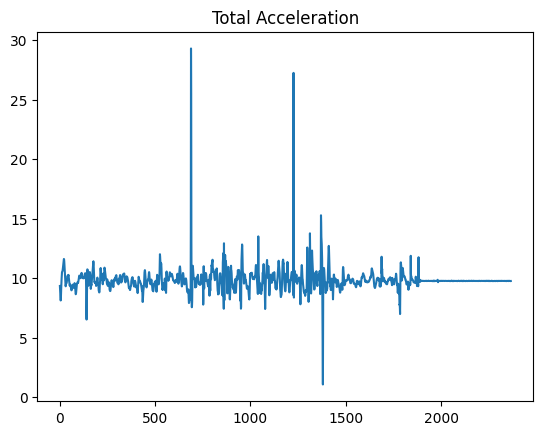

In [ ]:
X = data_in.index
plt.plot(X, tot_acc)
plt.title('Total Acceleration')
plt.show()

LOW PASS FILTERED GYROSCOPE DATA

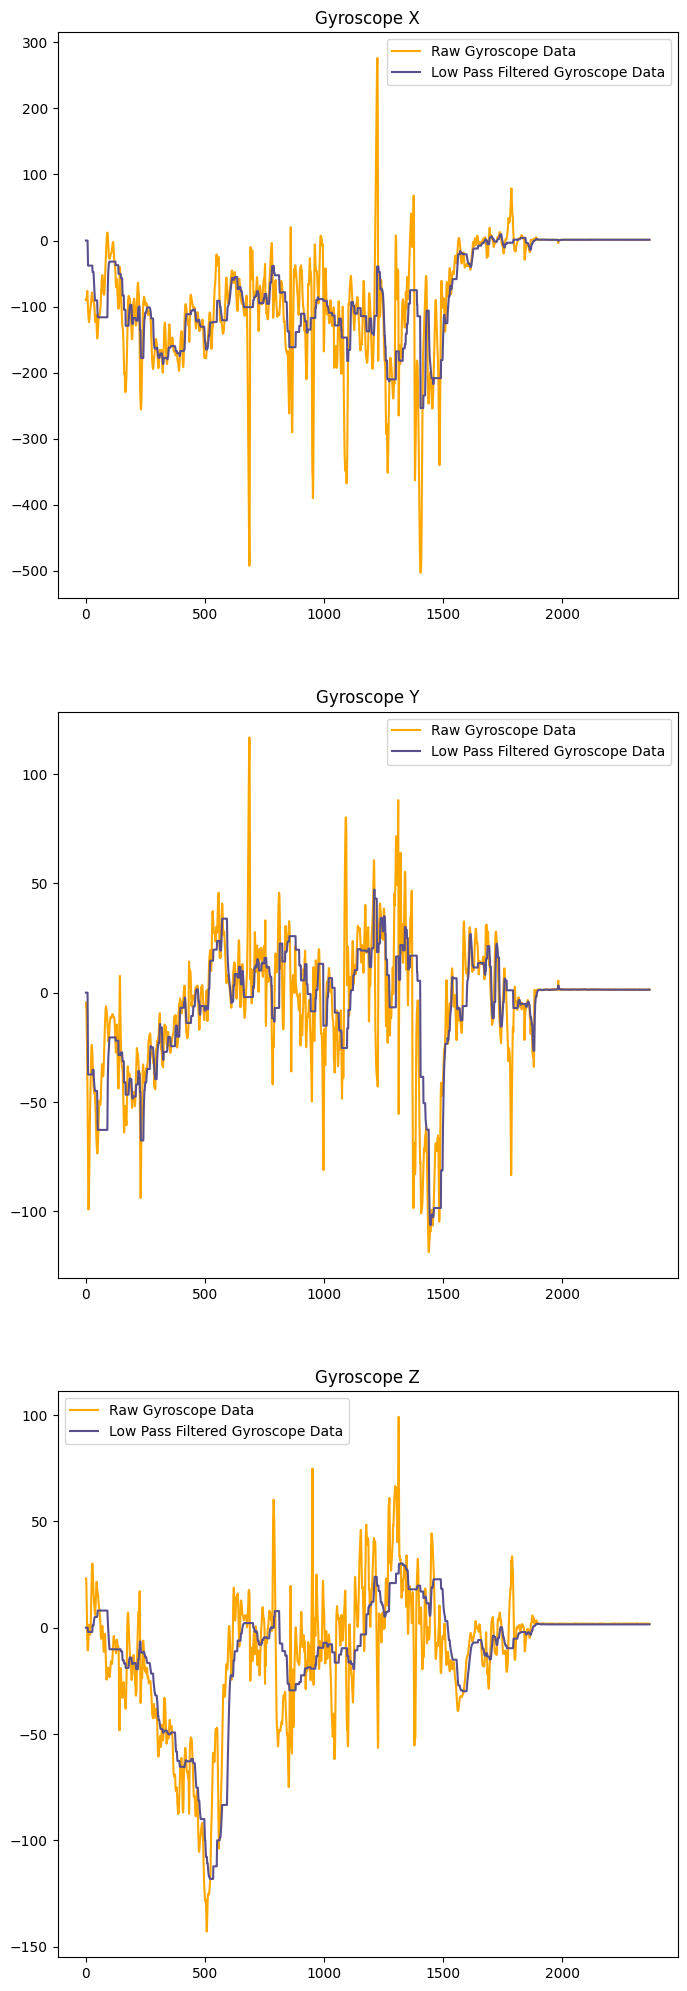

In [ ]:
X = data_in.index
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 25))

ax[0].plot(X, np.array(data_in.iloc[:, 3]), label='Raw Gyroscope Data', color='#ffa600')
ax[0].plot(X, gbx, label='Low Pass Filtered Gyroscope Data', color='#58508d')
ax[0].set_title('Gyroscope X')
ax[0].legend()

ax[1].plot(X, np.array(data_in.iloc[:, 4]), label='Raw Gyroscope Data', color='#ffa600')
ax[1].plot(X, gby, label='Low Pass Filtered Gyroscope Data', color='#58508d')
ax[1].set_title('Gyroscope Y')
ax[1].legend()

ax[2].plot(X, np.array(data_in.iloc[:, 5]), label='Raw Gyroscope Data', color='#ffa600')
ax[2].plot(X, gbz, label='Low Pass Filtered Gyroscope Data', color='#58508d')
ax[2].set_title('Gyroscope Z')
ax[2].legend()

plt.show()

In [ ]:
acc_g = norm_3(np.array(data_in.iloc[0, 0:3]))
gyro_w = np.array(data_in.iloc[0, 3:6])
mag_b = norm_3(np.array(data_in.iloc[0, 6:9]))

ALPHA = 0.9995
DT = 0.005
LIM = np.max(np.array(data_in.iloc[:, 3:6]))/DT

In [ ]:
for i in range(data_in.shape[0]):
    output = []
    acc_g = norm_3(np.array(data_in.iloc[i, 0:3].astype(np.float64)))
    mag_b = np.array(data_in.iloc[i, 6:9].astype(np.float64))

    if i==0:
      q_i = corr_outputs.iloc[0, 0:4].astype(np.float64)

    w_i = data_in.iloc[i, 3:6].astype(np.float64)#data in csv has the format col1-3:acc, col4-6:gyro, col7-9:mag

    bx, by, bz = gbx[i], gby[i], gbz[i]
    if bx < 1.6 and bx > -1.6:
        w_i[0] = w_i[0] - bx
    if by < 12 and by > -12:
        w_i[1] = w_i[1] - by
    if bz < 1.6 and bz > -1.6:
        w_i[2] = w_i[2] - bz

    w_i = [w*(np.pi/180) for w in w_i]#Convert to radians per second

    q_w = [0, w_i[0], w_i[1], w_i[2]]
    q_dot = calc_quat_dot(q_i, q_w)

    q_i = np.sum([q_i , [DT*q for q in q_dot]], axis = 0) #Integrate
    q_i = norm_4(q_i) #Normalise

    #Get Euler Angles and convert them into degrees
    roll = np.arctan2((2*q_i[2]*q_i[3]+ 2*q_i[0]*q_i[1]),(1 -2*(q_i[1]**2 + q_i[2]**2)))*(180/np.pi)#Roll
    pitch = np.arcsin(2*q_i[0]*q_i[2]- 2*q_i[1]*q_i[3])*(180/np.pi) #Pitch
    yaw = np.arctan2((2*q_i[1]*q_i[2]+ 2*q_i[0]*q_i[3]),(1- 2*(q_i[2]**2 + q_i[3]**2)))*(180/np.pi)#Yaw

    #Capture roll, pitch and yaw for error calculation
    prev_roll = data_out_nf_bc.iloc[i-1, 4]
    prev_pitch = data_out_nf_bc.iloc[i-1, 5]
    prev_yaw = data_out_nf_bc.iloc[i-1, 6]

    #Error calculation
    roll_err = abs(prev_roll - roll)
    pitch_err = abs(prev_pitch - pitch)
    yaw_err = abs(prev_yaw - yaw)

    #Detect discontinuity and reset
    if(roll_err>352):
      roll = 360 - roll_err
    if(pitch_err>172):
      pitch = 180 - pitch_err
    if(yaw_err>352):
      yaw = 360 - yaw_err

    output = [roll, pitch, yaw]

    data_out_nf_bc.iloc[i, 0] = q_i[0]
    data_out_nf_bc.iloc[i, 1] = q_i[1]
    data_out_nf_bc.iloc[i, 2] = q_i[2]
    data_out_nf_bc.iloc[i, 3] = q_i[3]

    data_out_nf_bc.iloc[i, 4] = output[0]
    data_out_nf_bc.iloc[i, 5] = output[1]
    data_out_nf_bc.iloc[i, 6] = output[2]

**OUTPUT DATA**

In [ ]:
data_out_eu.head()

,Roll,Pitch,Yaw
0,-61.481972,4.078405,0.846168
1,-61.924566,4.160423,0.923653
2,-62.376699,4.223521,0.999677
3,-62.828817,4.248216,1.09143
4,-63.248601,4.227866,1.196279


In [ ]:
data_out_nf.head()

,q0,q1,q2,q3,Roll,Pitch,Yaw
0,0.854436,-0.514068,-0.063771,-0.040078,-62.053314,-8.637442,-0.169378
1,0.852441,-0.517476,-0.063339,-0.039385,-62.512925,-8.554352,-0.092379
2,0.850378,-0.520939,-0.063045,-0.03879,-62.981797,-8.490171,-0.016633
3,0.848268,-0.524399,-0.063114,-0.038249,-63.454252,-8.464136,0.075504
4,0.846259,-0.527611,-0.063593,-0.037796,-63.897421,-8.482938,0.181511


In [ ]:
data_out_cf.head()

,q0,q1,q2,q3,Roll,Pitch,Yaw
0,0.854439,-0.513799,-0.063726,-0.040312,-62.052806,-8.631122,-0.168913
1,0.852556,-0.516984,-0.063257,-0.039863,-62.483983,-8.557481,-0.11793
2,0.850613,-0.520211,-0.062924,-0.039517,-62.922676,-8.502899,-0.068722
3,0.848629,-0.523419,-0.062949,-0.039235,-63.363689,-8.486472,-0.003801
4,0.846755,-0.526386,-0.063384,-0.039056,-63.774126,-8.516826,0.071857


In [ ]:
data_out_nf_2.head()

,q0,q1,q2,q3,Roll,Pitch,Yaw
0,0.854469,-0.514025,-0.063691,-0.040047,-62.046974,-8.627766,-0.171588
1,0.852508,-0.51739,-0.063179,-0.039324,-62.500226,-8.535026,-0.096868
2,0.850478,-0.520811,-0.062806,-0.038699,-62.962718,-8.461221,-0.023476
3,0.848403,-0.524229,-0.062795,-0.038127,-63.428761,-8.425596,0.066217
4,0.846428,-0.527398,-0.063193,-0.037644,-63.865478,-8.434845,0.169681


In [ ]:
data_out_nf_bc.head()

,q0,q1,q2,q3,Roll,Pitch,Yaw
0,0.854469,-0.514025,-0.063691,-0.040047,-62.046974,-8.627766,-0.171588
1,0.852508,-0.51739,-0.063179,-0.039324,-62.500226,-8.535026,-0.096868
2,0.850478,-0.520811,-0.062806,-0.038699,-62.962718,-8.461221,-0.023476
3,0.848403,-0.524229,-0.062795,-0.038127,-63.428761,-8.425596,0.066217
4,0.846428,-0.527398,-0.063193,-0.037644,-63.865478,-8.434845,0.169681


**CORRECT OUTPUTS**

In [ ]:
corr_outputs.head()

,q0,q1,q2,q3,Roll,Pitch,Yaw
1,0.856434,-0.510631,-0.064131,-0.040793,-61.589926,-8.714391,-0.253825
2,0.854358,-0.514151,-0.064061,-0.040206,-62.066448,-8.673703,-0.163827
3,0.852331,-0.517504,-0.064377,-0.039728,-62.524351,-8.676758,-0.063323
4,0.850425,-0.520561,-0.065154,-0.039357,-62.947140,-8.730830,0.051700
5,0.848574,-0.523435,-0.066464,-0.038999,-63.351138,-8.837161,0.196668


**ERROR TABULATION**

In [ ]:
for i in range(corr_outputs.shape[0]):

  corr_roll, corr_pitch, corr_yaw = corr_outputs.iloc[i, 4:7]
  roll_nf, pitch_nf, yaw_nf = data_out_nf_2.iloc[i, 4:7]
  roll_cf, pitch_cf, yaw_cf = data_out_cf.iloc[i, 4:7]
  roll_nf_bc, pitch_nf_bc, yaw_nf_bc = data_out_nf_bc.iloc[i, 4:7]

  err1 = [abs(corr_roll - roll_nf), abs(corr_pitch - pitch_nf), abs(corr_yaw - yaw_nf)]
  err2 = [abs(corr_roll - roll_cf), abs(corr_pitch - pitch_cf), abs(corr_yaw - yaw_cf)]
  err3 = [abs(corr_roll - roll_nf_bc), abs(corr_pitch - pitch_nf_bc), abs(corr_yaw - yaw_nf_bc)]

  for j in range(len(err1)):
      e1 = err1[j]
      e2 = err2[j]
      e3 = err3[j]
      if j!=1:
        if(e1>348):
          err1[j] = 360-e1
        if(e2>348):
          err2[j] = 360-e2
        if(e3>348):
          err3[j] = 360-e3
      elif j==1:
        if(e1>168):
          err1[j] = 180-e1
        if(e2>168):
          err2[j] = 180-e2
        if(e3>168):
          err3[j] = 180-e3

  error_df1.iloc[i, 0:4] = err1
  error_df2.iloc[i, 0:4] = err2
  error_df3.iloc[i, 0:4] = err3


**MEAN ERRORS**

In [ ]:
e1 = error_df1.mean(axis=0)
e2 = error_df2.mean(axis=0)
e3 = error_df3.mean(axis=0)

Error_DF = pd.DataFrame(columns=['Roll Error', 'Pitch Error', 'Yaw Error'], index = ['Without Filters', 'With Complementary Filter', 'With Bias Compensation'])
Error_DF['Roll Error'] = [e1[0], e2[0], e3[0]]
Error_DF['Pitch Error'] = [e1[1], e2[1], e3[1]]
Error_DF['Yaw Error'] = [e1[2], e2[2], e3[2]]

In [ ]:
Error_DF.head()

,Roll Error,Pitch Error,Yaw Error
Without Filters,3.271399,5.367870,2.677767
With Complementary Filter,10.654537,10.356401,8.343037
With Bias Compensation,3.169916,6.217658,1.910786


**FINAL ACCUMULATED ERRORS**

In [ ]:
Error_DF2 = pd.DataFrame(columns=['Roll Error', 'Pitch Error', 'Yaw Error'], index = ['Without Filters', 'With Complementary Filter', 'With Bias Compensation'])
Error_DF2['Roll Error'] = [error_df1.iloc[-2, 0], error_df2.iloc[-2, 0], error_df3.iloc[-2, 0]]
Error_DF2['Pitch Error'] = [error_df1.iloc[-2, 1], error_df2.iloc[-2, 1], error_df3.iloc[-2, 1]]
Error_DF2['Yaw Error'] = [error_df1.iloc[-2, 2], error_df2.iloc[-2, 2], error_df3.iloc[-2, 2]]

In [ ]:
Error_DF2.head()

,Roll Error,Pitch Error,Yaw Error
Without Filters,4.799497,11.119036,2.922549
With Complementary Filter,15.124199,33.077734,36.754831
With Bias Compensation,2.756676,8.420725,0.472579


**COMPARATIVE PLOTS**

EULER INTEGRATION PLOTS

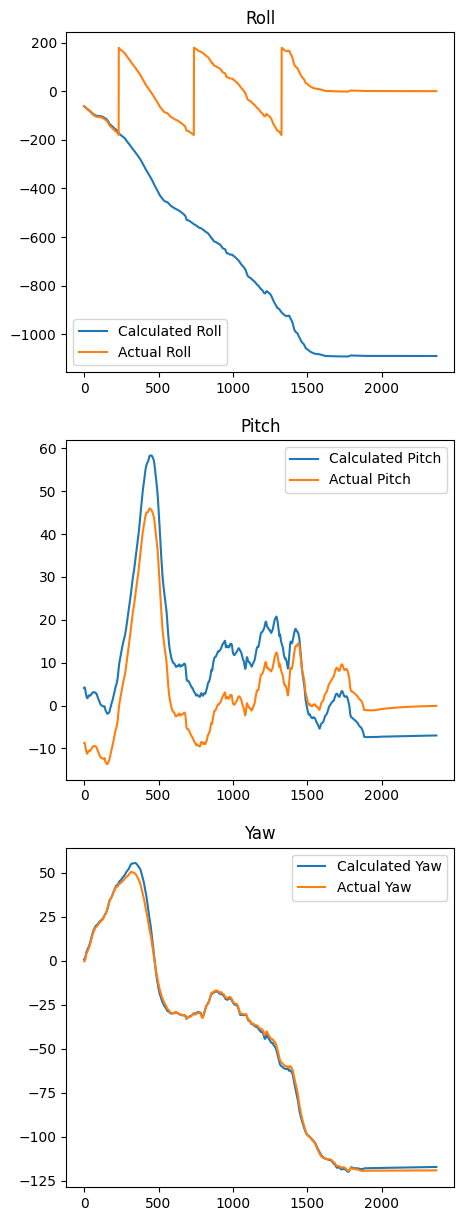

<Figure size 640x480 with 0 Axes>

In [ ]:
X1 = np.array(data_out_eu.index)
np.insert(X1, obj=[0], values = [0])
X2 = np.array(corr_outputs.index)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

#Roll Plot

my_roll = np.array(data_out_eu['Roll'])
ax[0].plot(X1, my_roll, label = 'Calculated Roll')
ax[0].set_title('Roll')

corr_roll = np.array(corr_outputs['Roll'])
ax[0].plot(X2, corr_roll, label = 'Actual Roll')
ax[0].legend()

#Pitch Plot

my_pitch = np.array(data_out_eu['Pitch'])
ax[1].plot(X1, my_pitch, label = 'Calculated Pitch')
ax[1].set_title('Pitch')

corr_pitch = np.array(corr_outputs['Pitch'])
ax[1].plot(X2, corr_pitch, label = 'Actual Pitch')
ax[1].legend()

#Yaw Plot

my_yaw = np.array(data_out_eu['Yaw'])
ax[2].plot(X1, my_yaw, label = 'Calculated Yaw')
ax[2].set_title('Yaw')

corr_yaw = np.array(corr_outputs['Yaw'])
ax[2].plot(X2, corr_yaw, label = 'Actual Yaw')
ax[2].legend()

plt.show()

fname = 'Complete_Graph_Euler_Integration'
plt.savefig(f'{fname}')


QUATERNION INTEGRATION PLOTS

**WITHOUT FILTERS**

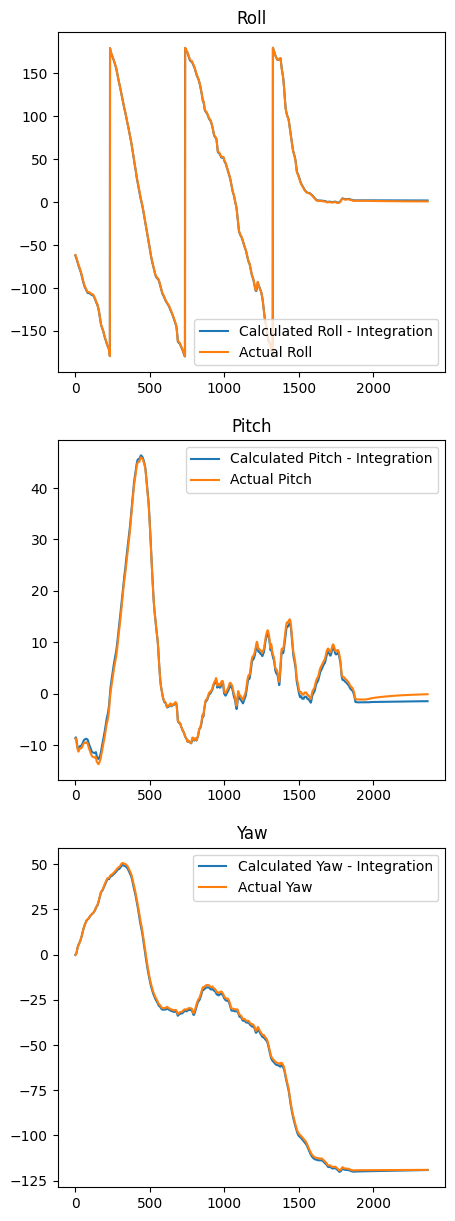

<Figure size 640x480 with 0 Axes>

In [ ]:
X1 = np.array(data_out_nf.index)
X2 = np.array(corr_outputs.index)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

#Roll Plot

my_roll_nf = np.array(data_out_nf['Roll'])
ax[0].plot(X1, my_roll_nf, label = 'Calculated Roll - Integration')
ax[0].set_title('Roll')

corr_roll = np.array(corr_outputs['Roll'])
ax[0].plot(X2, corr_roll, label = 'Actual Roll')
ax[0].legend()

#Pitch Plot

my_pitch_nf = np.array(data_out_nf['Pitch'])
ax[1].plot(X1, my_pitch_nf, label = 'Calculated Pitch - Integration')
ax[1].set_title('Pitch')

corr_pitch = np.array(corr_outputs['Pitch'])
ax[1].plot(X2, corr_pitch, label = 'Actual Pitch')
ax[1].legend()

#Yaw Plot

my_yaw_nf = np.array(data_out_nf['Yaw'])
ax[2].plot(X1, my_yaw_nf, label = 'Calculated Yaw - Integration')
ax[2].set_title('Yaw')

corr_yaw = np.array(corr_outputs['Yaw'])
ax[2].plot(X2, corr_yaw, label = 'Actual Yaw')
ax[2].legend()

plt.show()

fname = 'Graph1'
plt.savefig(f'{fname}')


**WITH COMPLEMENTARY FILTER**

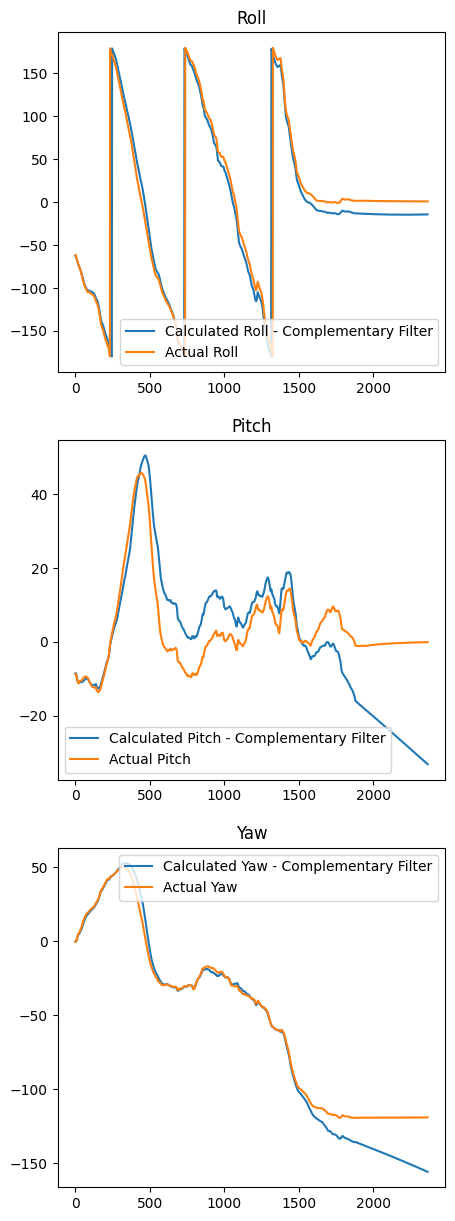

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

X1 = np.array(data_out_cf.index)
X2 = np.array(corr_outputs.index)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

#Roll Plot

my_roll_cf = np.array(data_out_cf['Roll'])
ax[0].plot(X1, my_roll_cf, label = 'Calculated Roll - Complementary Filter')
ax[0].set_title('Roll')

corr_roll = np.array(corr_outputs['Roll'])
ax[0].plot(X2, corr_roll, label = 'Actual Roll')
ax[0].legend()

#Pitch Plot

my_pitch_cf = np.array(data_out_cf['Pitch'])
ax[1].plot(X1, my_pitch_cf, label = 'Calculated Pitch - Complementary Filter')
ax[1].set_title('Pitch')

corr_pitch = np.array(corr_outputs['Pitch'])
ax[1].plot(X2, corr_pitch, label = 'Actual Pitch')
ax[1].legend()

#Yaw Plot

my_yaw_cf = np.array(data_out_cf['Yaw'])
ax[2].plot(X1, my_yaw_cf, label = 'Calculated Yaw - Complementary Filter')
ax[2].set_title('Yaw')

corr_yaw = np.array(corr_outputs['Yaw'])
ax[2].plot(X2, corr_yaw, label = 'Actual Yaw')
ax[2].legend()

plt.show()

fname = 'Graph2'
plt.savefig(f'{fname}')


**WITH COMPLEMENTARY FILTER - 2**

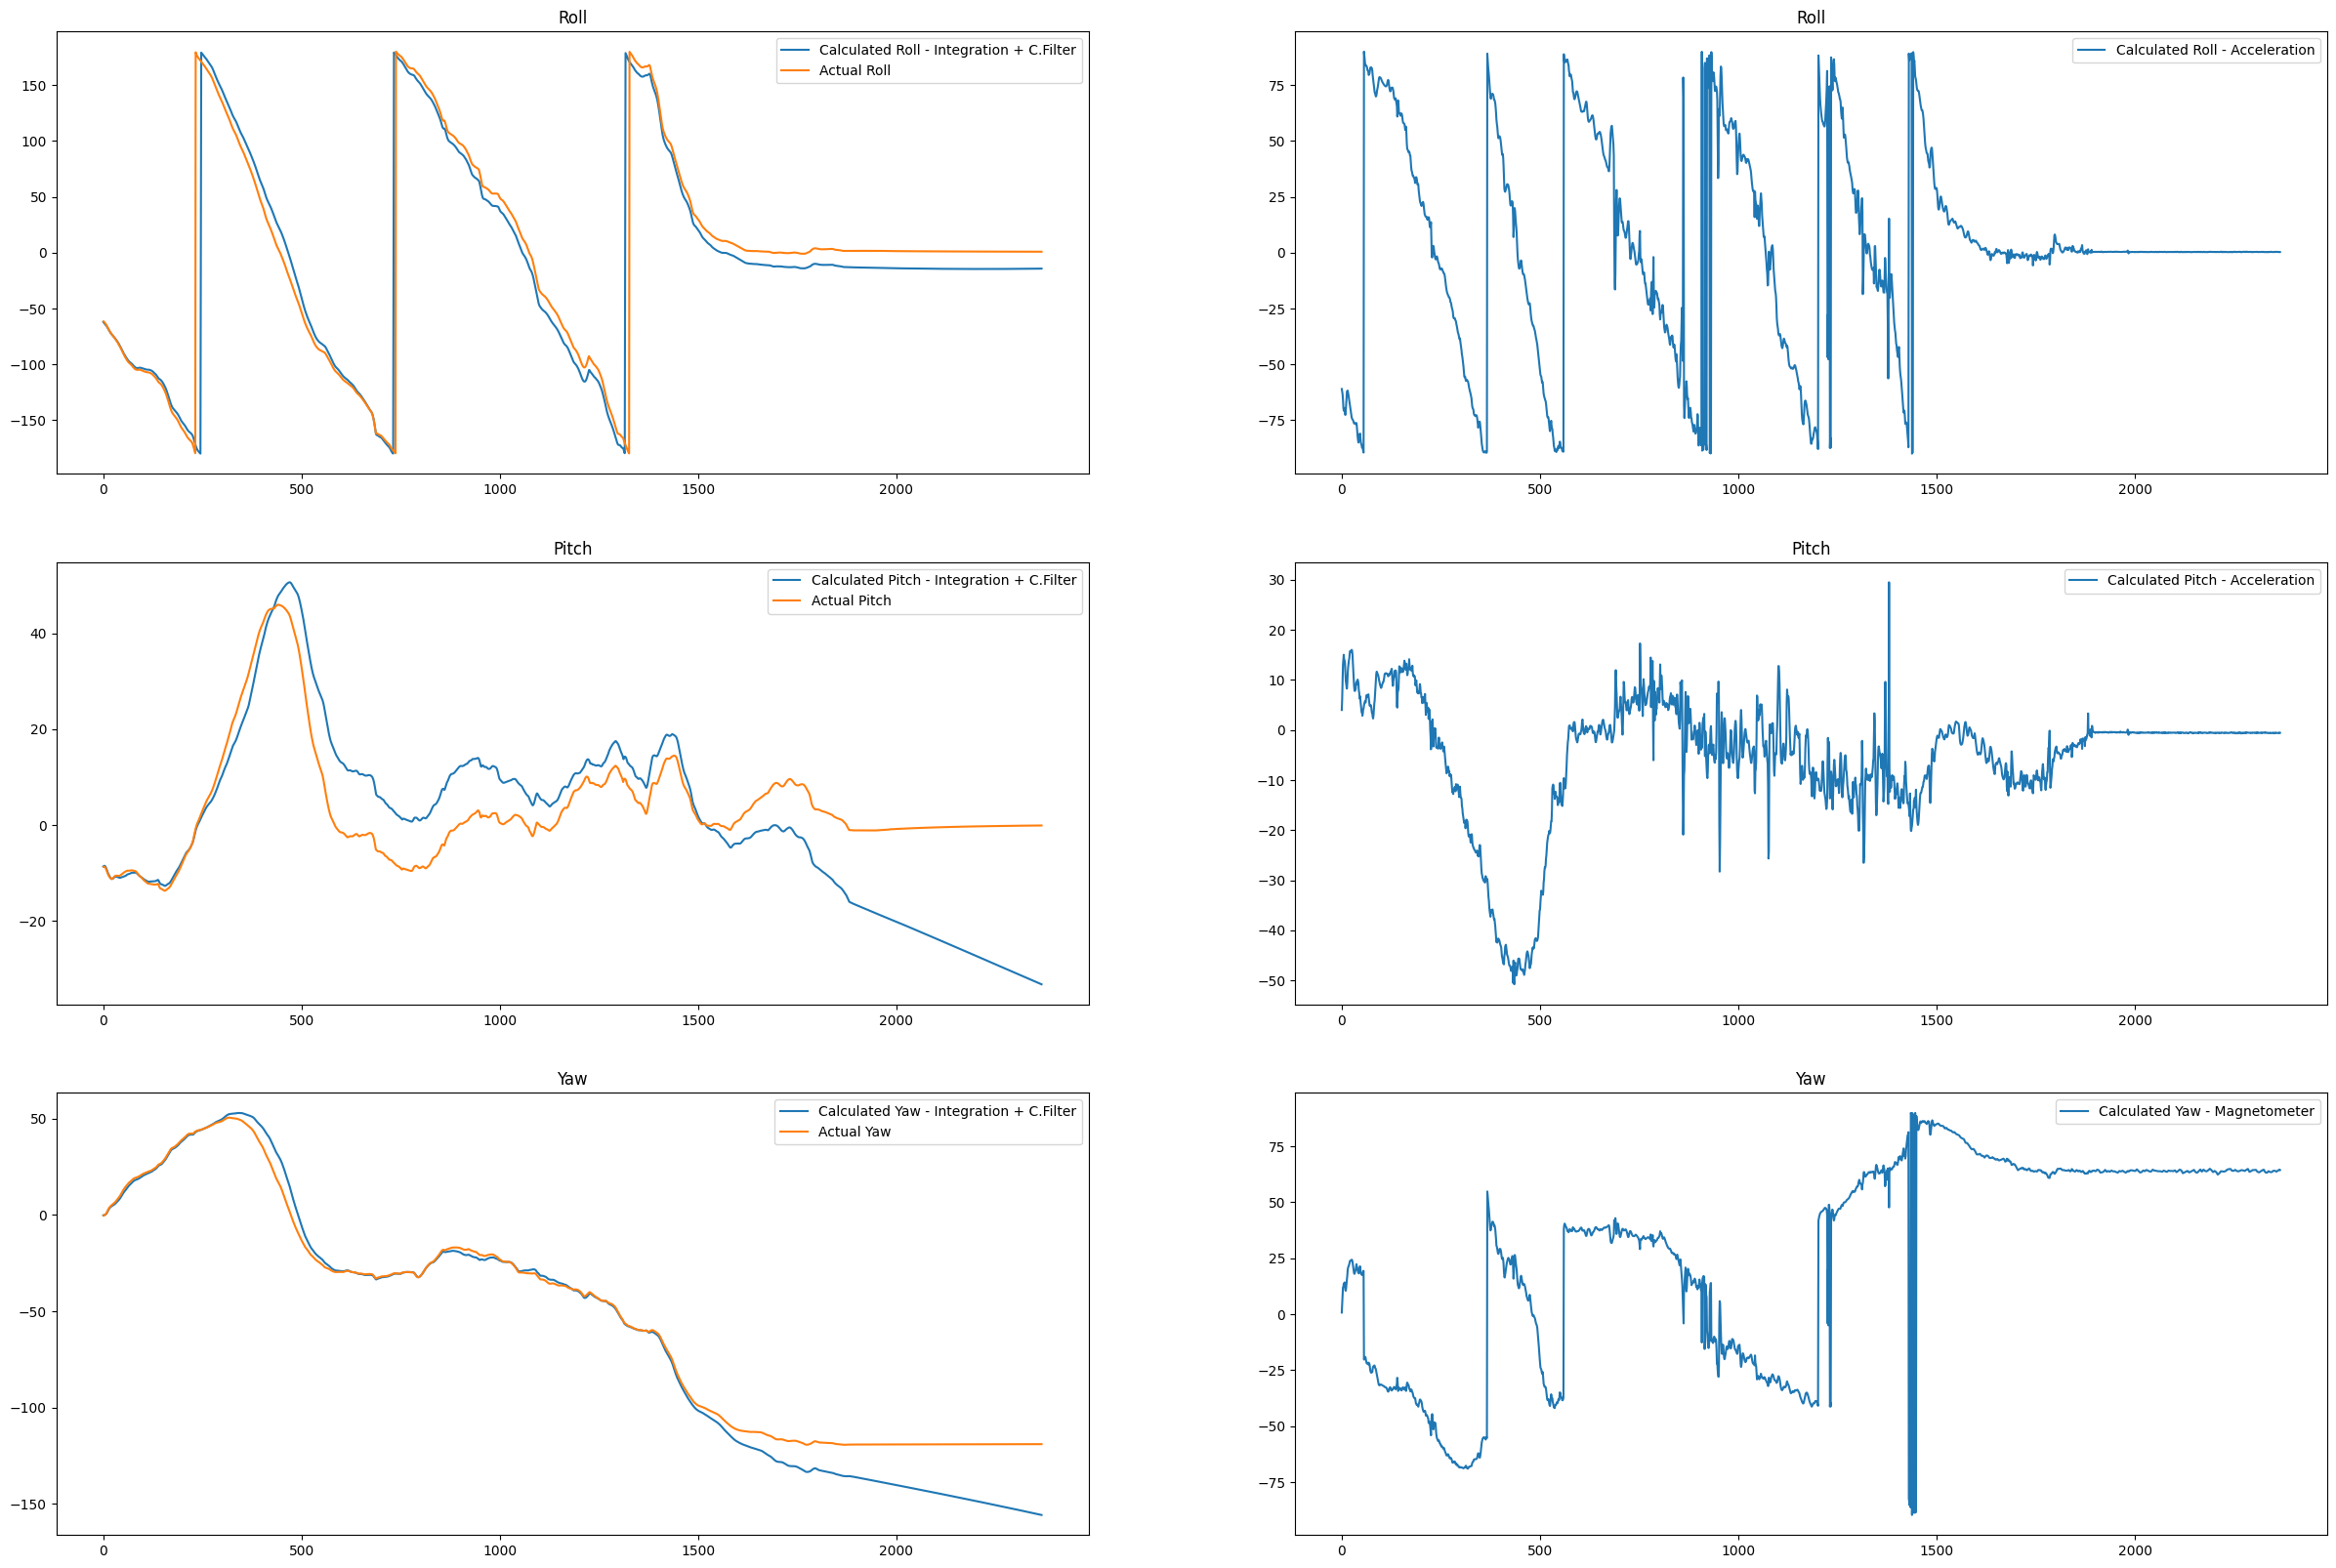

In [ ]:
X1 = np.array(data_out_cf.index)
X2 = np.array(corr_outputs.index)
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30,20))

#Roll Plot

my_roll_cf = np.array(data_out_cf['Roll'])
ax[0, 0].plot(X1, my_roll_cf, label = 'Calculated Roll - Integration + C.Filter')
ax[0, 0].set_title('Roll')

corr_roll = np.array(corr_outputs['Roll'])
ax[0, 0].plot(X2, corr_roll, label = 'Actual Roll')
ax[0, 0].legend()

#Pitch Plot

my_pitch_cf = np.array(data_out_cf['Pitch'])
ax[1, 0].plot(X1, my_pitch_cf, label = 'Calculated Pitch - Integration + C.Filter')
ax[1, 0].set_title('Pitch')

corr_pitch = np.array(corr_outputs['Pitch'])
ax[1, 0].plot(X2, corr_pitch, label = 'Actual Pitch')
ax[1, 0].legend()

#Yaw Plot

my_yaw_cf = np.array(data_out_cf['Yaw'])
ax[2, 0].plot(X1, my_yaw_cf, label = 'Calculated Yaw - Integration + C.Filter')
ax[2, 0].set_title('Yaw')

corr_yaw = np.array(corr_outputs['Yaw'])
ax[2, 0].plot(X2, corr_yaw, label = 'Actual Yaw')
ax[2, 0].legend()

#Acc and Mag

X = np.array(error_df.index)

#Roll Plot

acc_roll = np.array(error_df['Roll'])
ax[0, 1].plot(X, acc_roll, label = 'Calculated Roll - Acceleration')
ax[0, 1].set_title('Roll')
ax[0, 1].legend()

#Pitch Plot

acc_pitch = np.array(error_df['Pitch'])
ax[1, 1].plot(X, acc_pitch, label = 'Calculated Pitch - Acceleration')
ax[1, 1].set_title('Pitch')
ax[1, 1].legend()

#Yaw Plot

mag_yaw = np.array(error_df['Yaw'])
ax[2, 1].plot(X, mag_yaw, label = 'Calculated Yaw - Magnetometer')
ax[2, 1].set_title('Yaw')
ax[2, 1].legend()

plt.show()

**BIAS COMPENSATION GRAPHS**

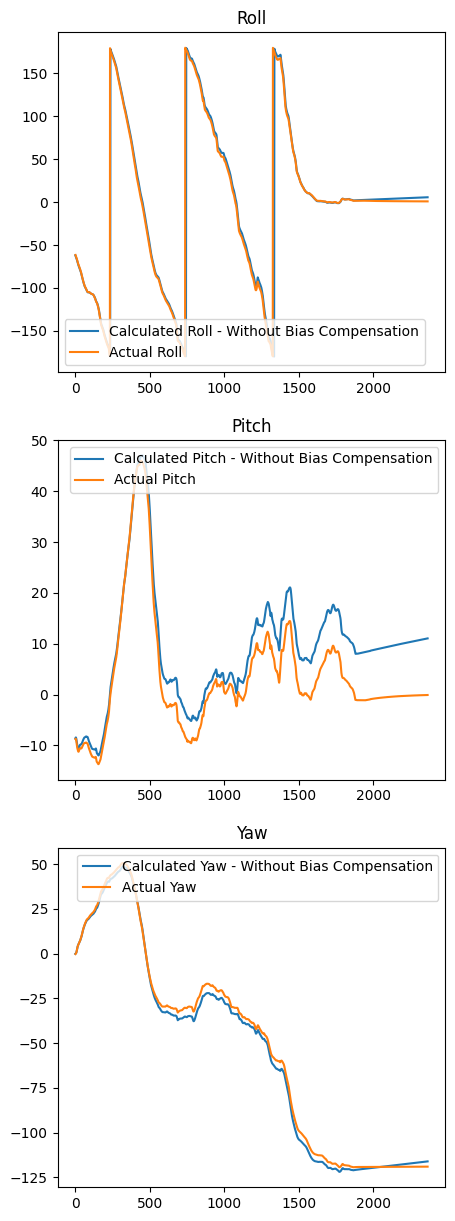

<Figure size 640x480 with 0 Axes>

In [ ]:
X1 = np.array(data_out_nf_2.index)
X2 = np.array(corr_outputs.index)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

#Roll Plot

my_roll_nf_2 = np.array(data_out_nf_2['Roll'])
ax[0].plot(X1, my_roll_nf_2, label = 'Calculated Roll - Without Bias Compensation')
ax[0].set_title('Roll')

corr_roll = np.array(corr_outputs['Roll'])
ax[0].plot(X2, corr_roll, label = 'Actual Roll')
ax[0].legend()

#Pitch Plot

my_pitch_nf_2 = np.array(data_out_nf_2['Pitch'])
ax[1].plot(X1, my_pitch_nf_2, label = 'Calculated Pitch - Without Bias Compensation')
ax[1].set_title('Pitch')

corr_pitch = np.array(corr_outputs['Pitch'])
ax[1].plot(X2, corr_pitch, label = 'Actual Pitch')
ax[1].legend()

#Yaw Plot

my_yaw_nf_2 = np.array(data_out_nf_2['Yaw'])
ax[2].plot(X1, my_yaw_nf_2, label = 'Calculated Yaw - Without Bias Compensation')
ax[2].set_title('Yaw')

corr_yaw = np.array(corr_outputs['Yaw'])
ax[2].plot(X2, corr_yaw, label = 'Actual Yaw')
ax[2].legend()

plt.show()

fname = 'Graph1'
plt.savefig(f'{fname}')


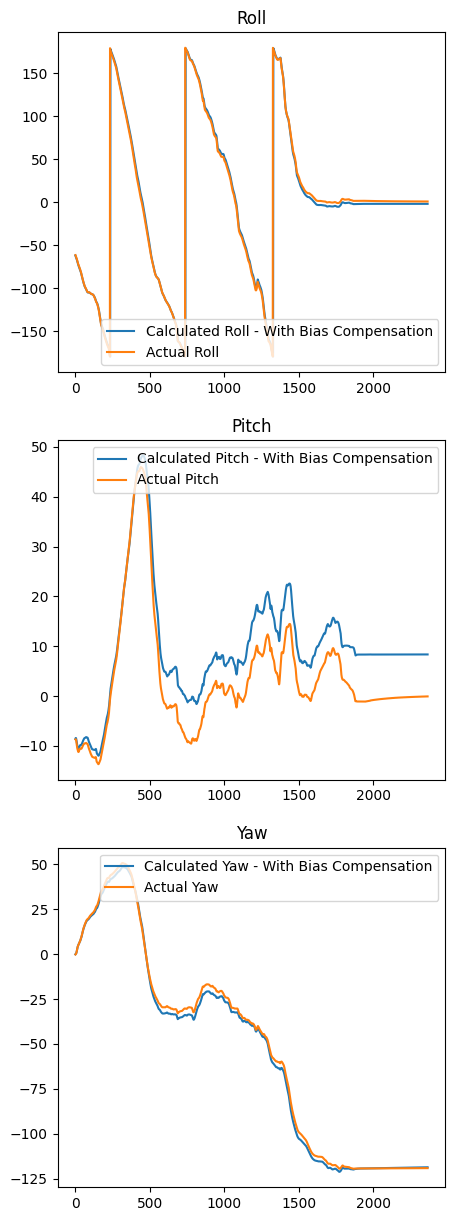

<Figure size 640x480 with 0 Axes>

In [ ]:
X1 = np.array(data_out_nf_bc.index)
X2 = np.array(corr_outputs.index)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

#Roll Plot

my_roll_nf_bc = np.array(data_out_nf_bc['Roll'])
ax[0].plot(X1, my_roll_nf_bc, label = 'Calculated Roll - With Bias Compensation')
ax[0].set_title('Roll')

corr_roll = np.array(corr_outputs['Roll'])
ax[0].plot(X2, corr_roll, label = 'Actual Roll')
ax[0].legend()

#Pitch Plot

my_pitch_nf_bc = np.array(data_out_nf_bc['Pitch'])
ax[1].plot(X1, my_pitch_nf_bc, label = 'Calculated Pitch - With Bias Compensation')
ax[1].set_title('Pitch')

corr_pitch = np.array(corr_outputs['Pitch'])
ax[1].plot(X2, corr_pitch, label = 'Actual Pitch')
ax[1].legend()

#Yaw Plot

my_yaw_nf_bc = np.array(data_out_nf_bc['Yaw'])
ax[2].plot(X1, my_yaw_nf_bc, label = 'Calculated Yaw - With Bias Compensation')
ax[2].set_title('Yaw')

corr_yaw = np.array(corr_outputs['Yaw'])
ax[2].plot(X2, corr_yaw, label = 'Actual Yaw')
ax[2].legend()

plt.show()

fname = 'Bias_Compensated_Outputs'
plt.savefig(f'{fname}')


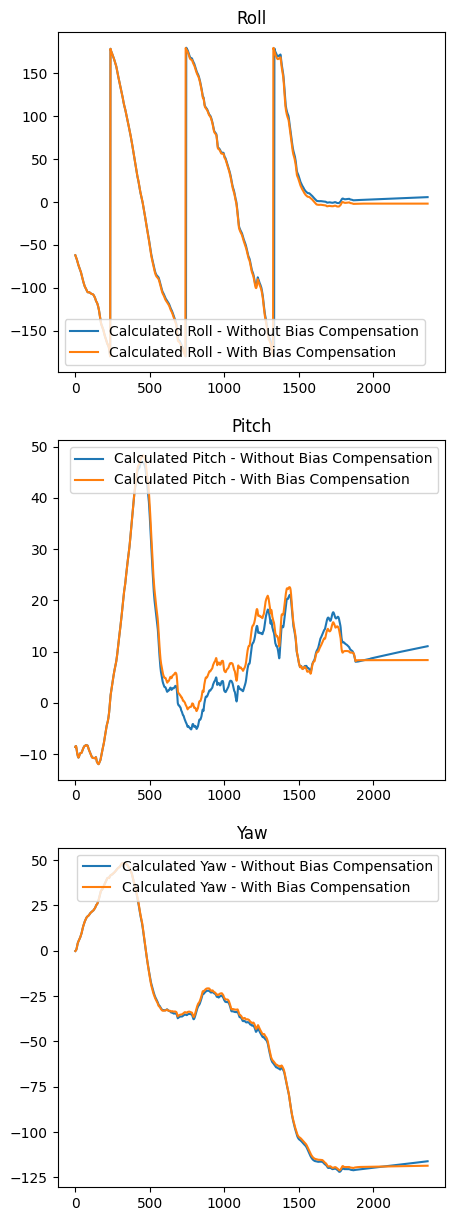

In [ ]:
X1 = np.array(data_out_nf_2.index)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

ax[0].plot(X1, my_roll_nf_2, label = 'Calculated Roll - Without Bias Compensation')
ax[0].plot(X1, my_roll_nf_bc, label = 'Calculated Roll - With Bias Compensation')
ax[0].set_title('Roll')
ax[0].legend()

ax[1].plot(X1, my_pitch_nf_2, label = 'Calculated Pitch - Without Bias Compensation')
ax[1].plot(X1, my_pitch_nf_bc, label = 'Calculated Pitch - With Bias Compensation')
ax[1].set_title('Pitch')
ax[1].legend()

ax[2].plot(X1, my_yaw_nf_2, label = 'Calculated Yaw - Without Bias Compensation')
ax[2].plot(X1, my_yaw_nf_bc, label = 'Calculated Yaw - With Bias Compensation')
ax[2].set_title('Yaw')
ax[2].legend()

plt.show()

**ERROR COMPARISON PLOTS - WITHOUT FILTERS VS. WITH COMPLEMENTARY FILTER**




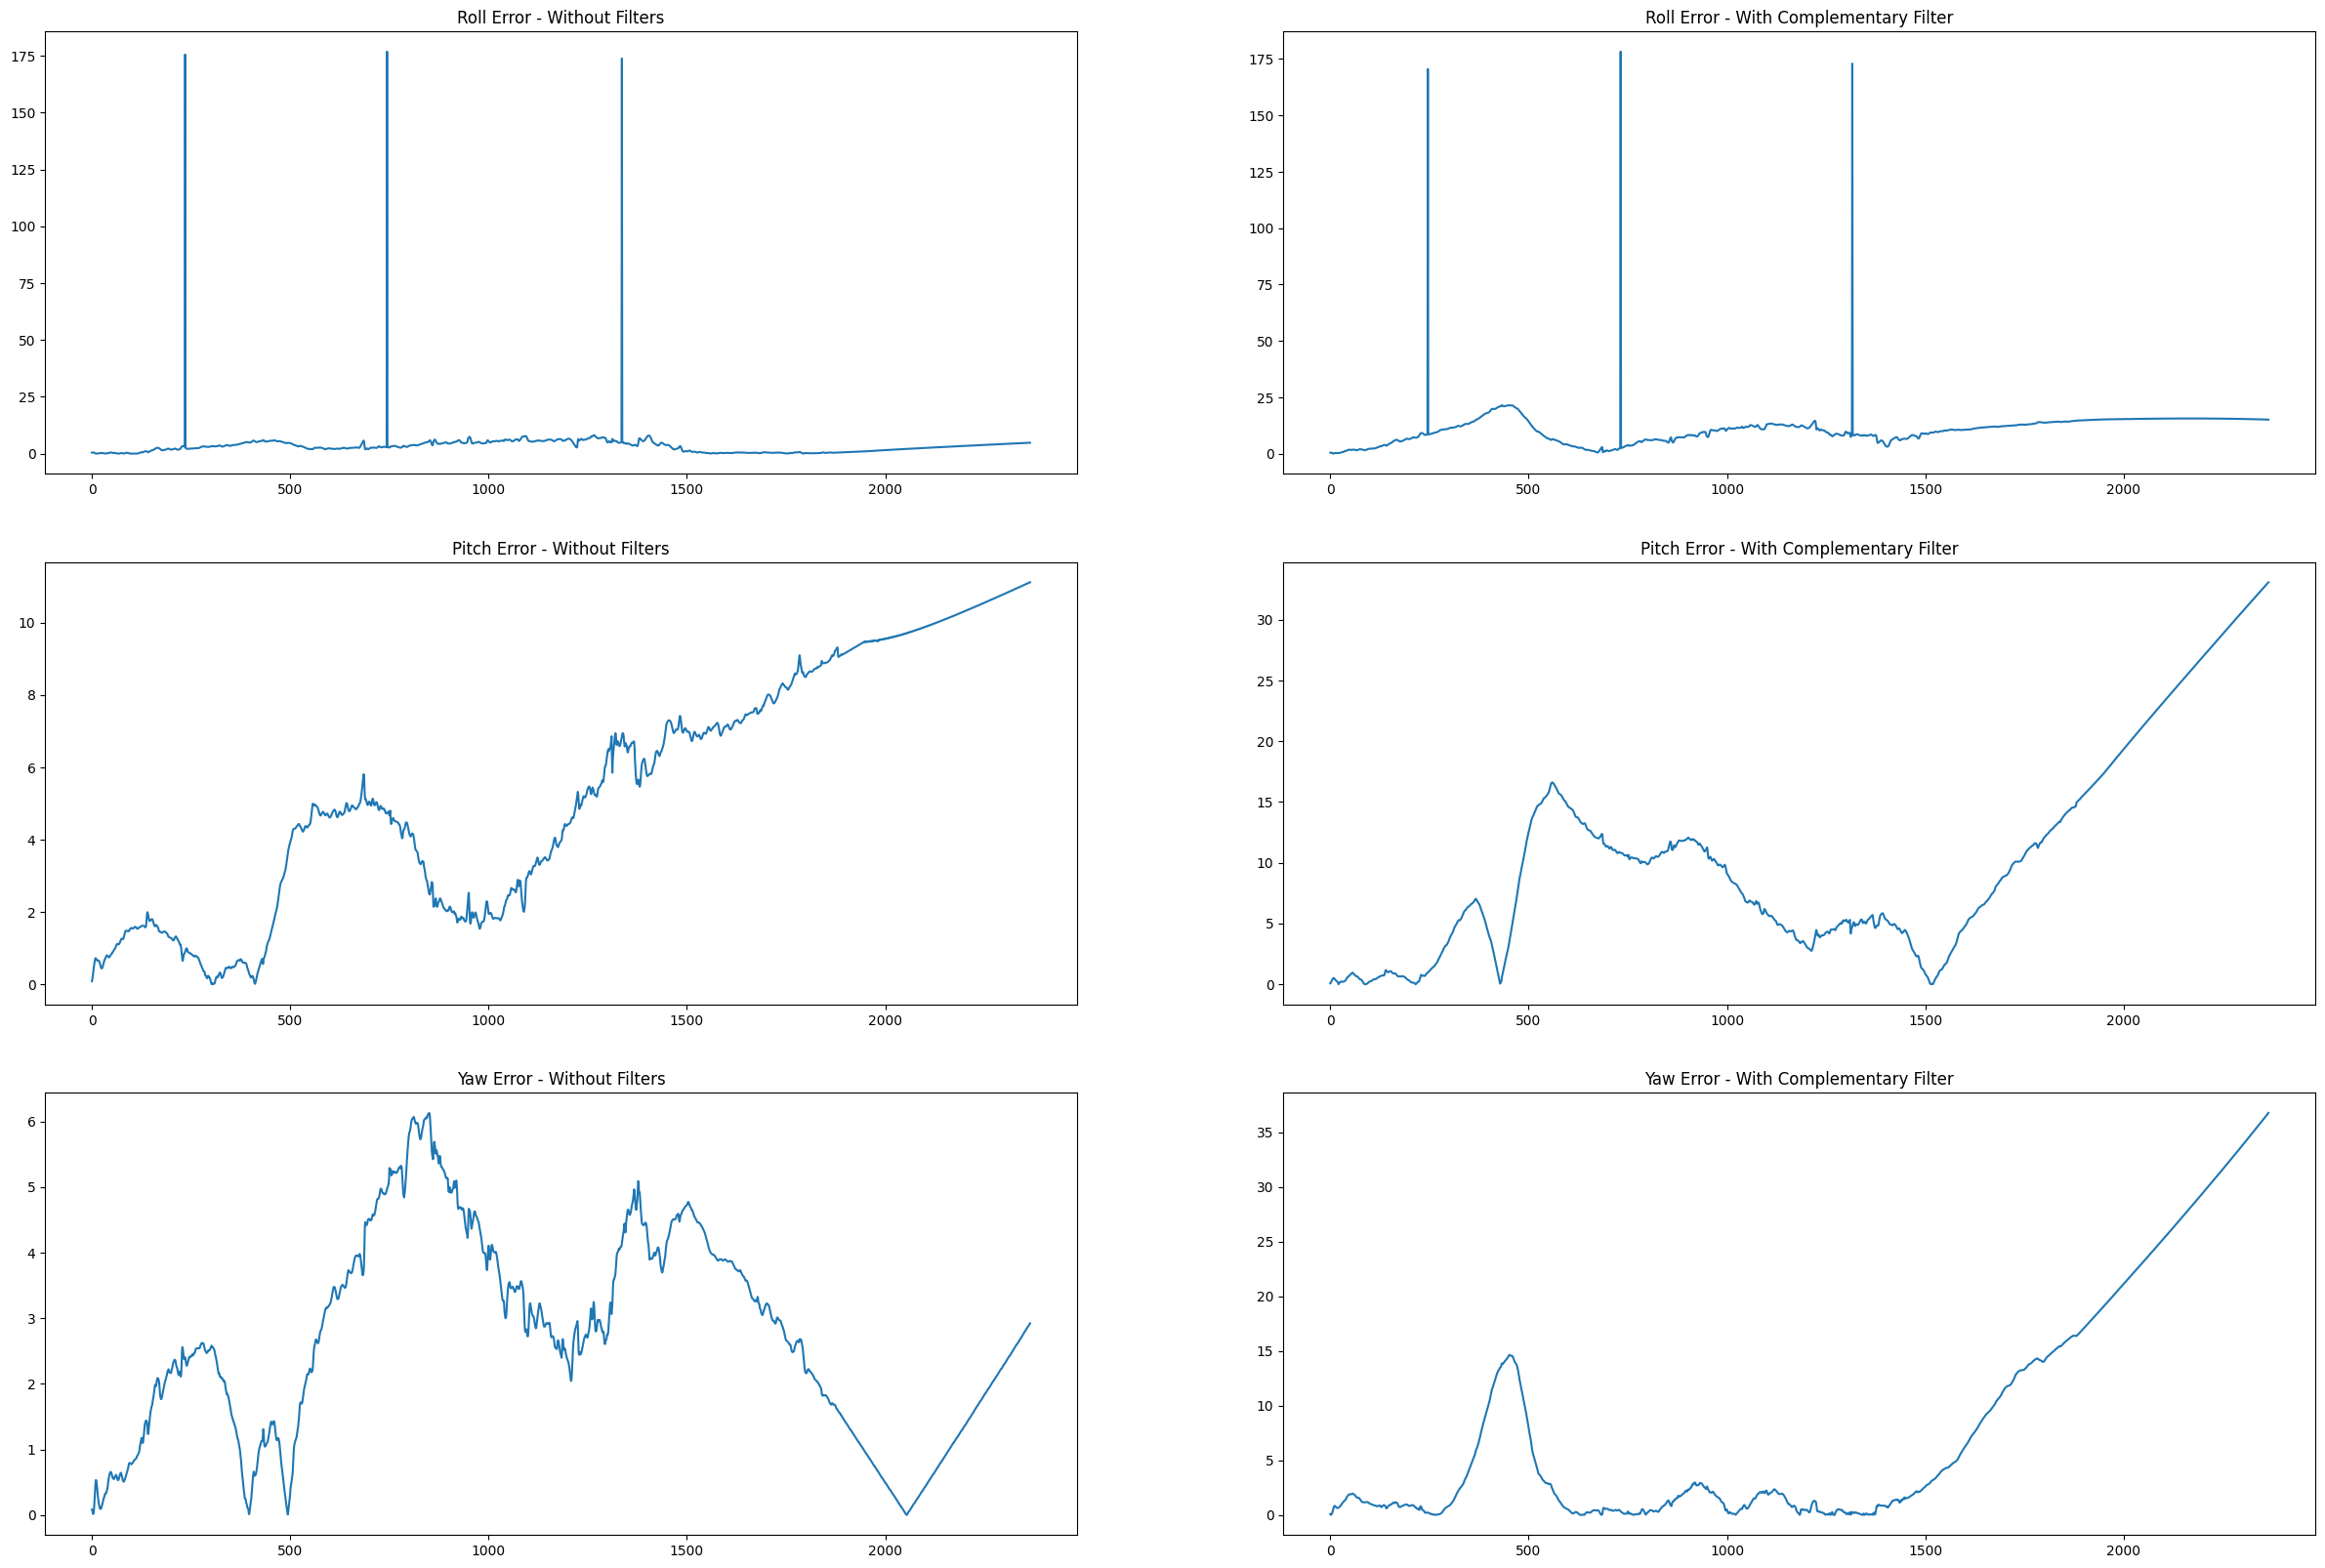

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30,20))

X1 = np.array(error_df1.index)

roll_err = np.array(error_df1['Roll Error'])
ax[0, 0].plot(X1, roll_err)
ax[0, 0].set_title('Roll Error - Without Filters')

pitch_err = np.array(error_df1['Pitch Error'])
ax[1, 0].plot(X1, pitch_err)
ax[1, 0].set_title('Pitch Error - Without Filters')

yaw_err = np.array(error_df1['Yaw Error'])
ax[2, 0].plot(X1, yaw_err)
ax[2, 0].set_title('Yaw Error - Without Filters')

X2 = np.array(error_df2.index)

roll_err = np.array(error_df2['Roll Error'])
ax[0, 1].plot(X2, roll_err)
ax[0, 1].set_title('Roll Error - With Complementary Filter')

pitch_err = np.array(error_df2['Pitch Error'])
ax[1, 1].plot(X2, pitch_err)
ax[1, 1].set_title('Pitch Error - With Complementary Filter')

yaw_err = np.array(error_df2['Yaw Error'])
ax[2, 1].plot(X2, yaw_err)
ax[2, 1].set_title('Yaw Error - With Complementary Filter')

plt.show()


**ERROR COMPARISON PLOTS - WITHOUT BIAS COMPENSATION VS. WITH BIAS COMPENSATION**




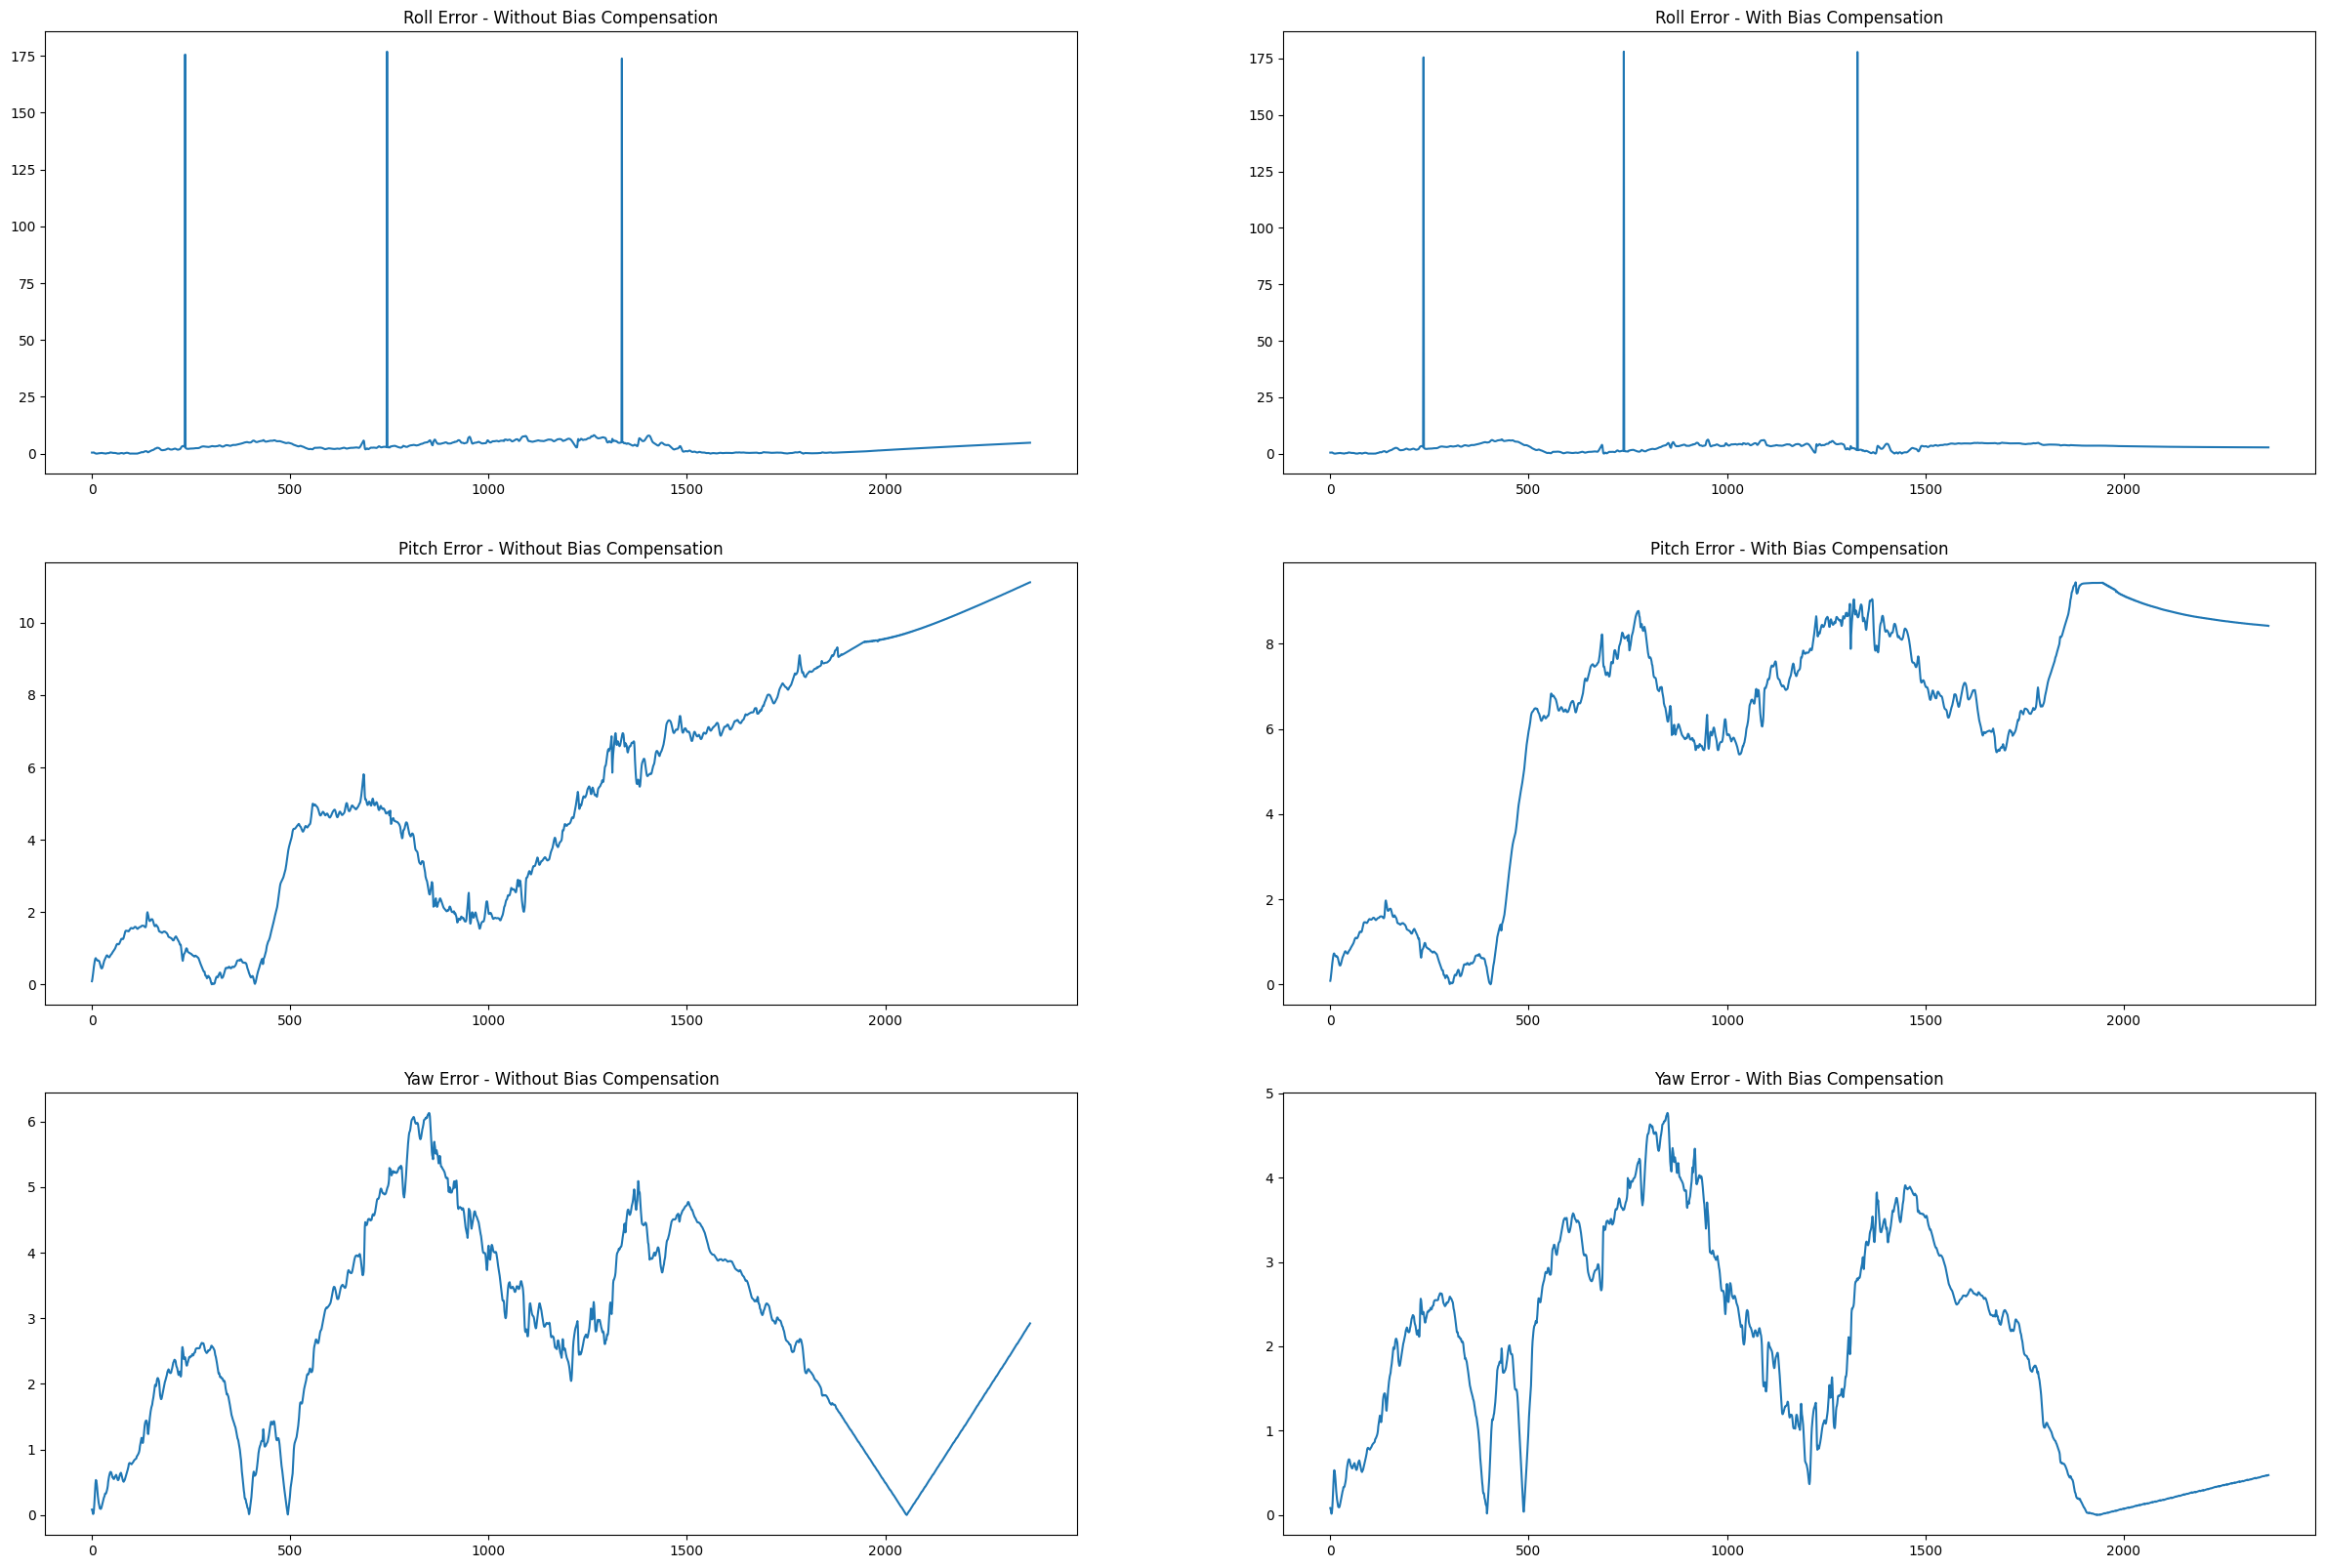

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30,20))

X1 = np.array(error_df3.index)

roll_err = np.array(error_df1['Roll Error'])
ax[0, 0].plot(X1, roll_err)
ax[0, 0].set_title('Roll Error - Without Bias Compensation')

pitch_err = np.array(error_df1['Pitch Error'])
ax[1, 0].plot(X1, pitch_err)
ax[1, 0].set_title('Pitch Error - Without Bias Compensation')

yaw_err = np.array(error_df1['Yaw Error'])
ax[2, 0].plot(X1, yaw_err)
ax[2, 0].set_title('Yaw Error - Without Bias Compensation')

X2 = np.array(error_df3.index)

roll_err = np.array(error_df3['Roll Error'])
ax[0, 1].plot(X2, roll_err)
ax[0, 1].set_title('Roll Error - With Bias Compensation')

pitch_err = np.array(error_df3['Pitch Error'])
ax[1, 1].plot(X2, pitch_err)
ax[1, 1].set_title('Pitch Error - With Bias Compensation')

yaw_err = np.array(error_df3['Yaw Error'])
ax[2, 1].plot(X2, yaw_err)
ax[2, 1].set_title('Yaw Error - With Bias Compensation')

plt.show()


**INDIVIDUAL COMPARATIVE PLOTS**

(Only for the purpose of saving relevant figures)

In [ ]:
X1 = np.array(data_out_nf.index)
X2 = np.array(corr_outputs.index)
X2 = np.insert(X2, obj=[0], values=[0])
X2 = X2[0:-1]

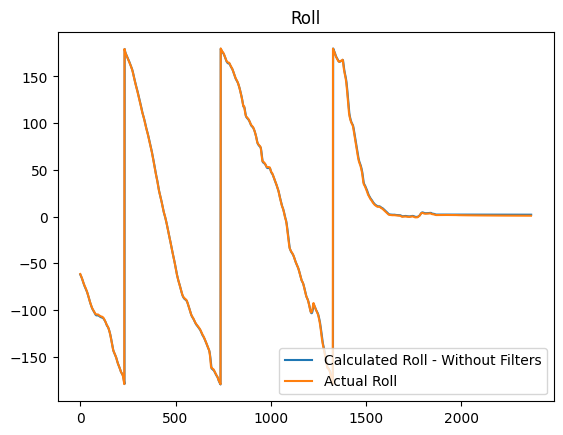

<Figure size 640x480 with 0 Axes>

In [ ]:
#Roll Plot

my_roll = np.array(data_out_nf['Roll'])
plt.plot(X1, my_roll, label = 'Calculated Roll - Without Filters')
plt.title('Roll')

corr_roll = np.array(corr_outputs['Roll'])
plt.plot(X2, corr_roll, label = 'Actual Roll')

plt.legend()
plt.show()

fname = 'Roll_Graph'
plt.savefig(f'{fname}')

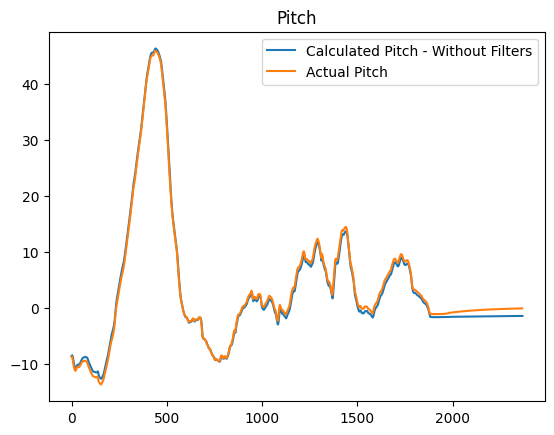

<Figure size 640x480 with 0 Axes>

In [ ]:
#Pitch Plot

my_pitch = np.array(data_out_nf['Pitch'])
plt.plot(X1, my_pitch, label = 'Calculated Pitch - Without Filters')
plt.title('Pitch')

corr_pitch = np.array(corr_outputs['Pitch'])
plt.plot(X2, corr_pitch, label = 'Actual Pitch')

plt.legend()
plt.show()

fname = 'Pitch_Graph'
plt.savefig(f'{fname}')

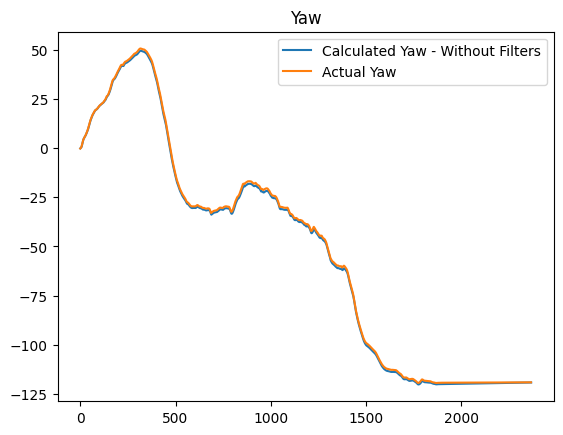

<Figure size 640x480 with 0 Axes>

In [ ]:
#Yaw Plot

my_yaw = np.array(data_out_nf['Yaw'])
plt.plot(X1, my_yaw, label = 'Calculated Yaw - Without Filters')
plt.title('Yaw')

corr_yaw = np.array(corr_outputs['Yaw'])
plt.plot(X2, corr_yaw, label = 'Actual Yaw')

plt.legend()
plt.show()

fname = 'Yaw_Graph'
plt.savefig(f'{fname}')

**SAVING CALCULATED OUTPUTS TO A CSV FILE**

In [ ]:
data_out_nf.to_csv(csv_out)